# TELECOM CHURN CASE STUDY

##### Business Analytics, DS C17 Group 2 February 2020

In [7]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)

pd.set_option('display.max_rows',200)

In [9]:
#Read the data
telecom = pd.read_csv("telecom_churn_data.csv")
telecom

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(99999, 226)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Step 1: DATA CLEANING

### Removing the date columns and the id columns as they won't be of any use in the analysis

In [12]:
telecom = telecom.drop(['mobile_number','circle_id'], axis=1)
telecom = telecom.drop(['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'], axis=1)

## Treating Missing Values

In [13]:
pd.set_option('display.max_rows', telecom.shape[0]+1)

In [14]:
telecom.isnull().sum()*100/len(telecom)

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

## Imputing with Zeroes

#### Amongst the recharge columns, the column starting from total_rech_data_6 to av_rech_amt_data_9 have high percentage of missing values. So, we need to treat these and see whether we should replace them with zeroes.

In [15]:
rch_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
            'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
            'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom[rch_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000         2.000000         2.000000   
max         1555.00000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     25922.000000        25153.000000        25571.000000   
mean          0.659363          192.600982          200.981292   
std           1.411513          192.646318          196.791224   
min           0.000000            1.000000            0.500000   
25%           0.000000           82.000000           92.000000   
50%           0.000000          154.000000          154.000000   
75%           1.000000          252.000000          252.000000   
max          49.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

##### The recharge columns with minimum value of 1 should have their missing values imputed with 0.
##### One more interesting point to note here is that the recharge columns for the respective month have the exact same proportion of missing values. For example, total_rech_data_6 has the same percentage of missing values as max_rech_data_6, count_rech_2g_6, count_rech_3g_6 and av_rech_amt_data_6. Hence the missing values imputation gets easy as we are sure now that the values missing here are simply because of the customer not recharging in that particular month. 

In [16]:
rch_cols_zero_imputation = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'] 

In [17]:
telecom[rch_cols_zero_imputation] = telecom[rch_cols_zero_imputation].replace(np.NaN,0)

## Treating missing values in categorical variables

#### From the data description and the dictionary, it is evident that the variables with prefix as 'night_pck_user' and 'fb_user' are the categorical variables with a minimum value of 0 and a maximum value of 1.

In [18]:
# Replacing the missing values with a new category 'Missing'
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
telecom[cat_cols] = telecom[cat_cols].replace(np.NaN,'Missing')

## Remove variables with high percentage of missing values

#### Taking the threshold as 70%

In [19]:
column_with_nan = telecom.columns[telecom.isnull().any()]
for column in column_with_nan:
    if telecom[column].isnull().sum()*100.0/telecom.shape[0] > 70:
        telecom.drop(column,1, inplace=True)

## Using the Median to impute remaining missing values in the numerical columns

In [20]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

rch_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
            'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
            'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

num_cols = [column for column in telecom.columns if column not in cat_cols + rch_cols + date_cols]

In [21]:
telecom[num_cols] = telecom[num_cols].replace(np.NaN,telecom.median())

In [22]:
telecom.isnull().sum()*100/len(telecom)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

## Step 2: FILTER HIGH VALUE CUSTOMERS

#### Calculating total data recharge amount for the good phase (months June and July)

In [23]:
telecom['total_data_rech_6'] = telecom['av_rech_amt_data_6']*telecom['total_rech_data_6']
telecom['total_data_rech_7'] = telecom['av_rech_amt_data_7']*telecom['total_rech_data_7']

#### Calculating total recharge amount (data+normal recharge)

In [24]:
telecom['total_rech_6'] = telecom['total_data_rech_6'] + telecom['total_rech_amt_6']
telecom['total_rech_7'] = telecom['total_data_rech_7'] + telecom['total_rech_amt_7']

#### Average recharge in June and July

In [25]:
telecom['avg_rech_6_7'] = (telecom['total_rech_6'] + telecom['total_rech_7'])/2

#### Dropping observations of customers below 70th percentile recharge amount

In [26]:
telecom = telecom.drop(telecom[telecom['avg_rech_6_7'] <= np.percentile(telecom.avg_rech_6_7,70)].index, inplace =False)

##### We need to remove the columns which we created on our own to get to the percentile value

In [27]:
telecom = telecom.drop(['total_data_rech_6','total_data_rech_7','total_rech_6','total_rech_7','avg_rech_6_7'], axis=1)

In [28]:
telecom.shape

(29953, 196)

In [29]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0   197.385   214.816   
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
21             0.0             0.0             0.0   514.453   597.753   
23             0.0             0.0             0.0    74.350   193.897   

      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0    213.803   21.100        34.31        32.33         0.00        29.84   
7   3171.480  500.000        57.84        54.68        52.29        29.84   
8    137.362  166.787       413.69       351.03        35.08        33.46   
21   637.760  578.596       102.41       132.11        85.14       161.63   
23   366.966  811.480        48.96        50.66        33.58        15.74   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0          96.31        91.735          0.00         87.29           0.00   
7         453.43       567.160        325.91         87.29          16.23   
8          94.66        80.630        136.48        108.71           0.00   
21        757.93       896.680        983.39        869.89           0.00   
23         85.41        89.360        205.89        111.88           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0            0.00           0.00            0.0           0.00           0.00   
7           33.49          31.64            0.0          23.74          12.59   
8            0.00           0.00            0.0           0.00           0.00   
21           0.00           0.00            0.0           0.00           0.00   
23           0.00           0.00            0.0           0.00           0.00   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.00            0.0             11.91             11.61   
7           38.06            0.0             51.39             31.38   
8            0.00            0.0            297.13            217.59   
21           0.00            0.0              4.48              6.16   
23           0.00            0.0             48.96             50.66   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00             11.26             41.03             40.43   
7              40.28             11.26            308.63            447.38   
8              12.49             26.13             80.96             70.58   
21             23.34             29.98             91.81             87.93   
23             33.58             15.74             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00             39.12              0.00              0.00   
7             162.28             39.12             62.13             55.14   
8              50.54             34.58              0.00              0.00   
21            104.81            107.54              0.75              0.00   
23            148.56             83.73              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               0.00              0.00               0.0               0.0   
7              53.23              0.00               0.0               0.0   
8               0.00              0.00               0.0               0.0   
21              1.58              0.00               0.0               0.0   
23              0.00              2.45               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0               0.00              0.00         65.11        63.685   
7               0.00              0.00        422.16       533.910   
8               7.15              0.00        378.09       288.180   
21              0.00      

## Step 3: DERIVE CHURN, the target variable

##### Based on September Data

#### Total minutes of usage

In [30]:
telecom['total_calls_mou'] = telecom['total_og_mou_9'] + telecom['total_ic_mou_9']

#### Total consumption of data

In [31]:
telecom['total_internet'] = telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']

##### Make the column 'churn' and define a customer as churn iff the sum of minutes usage and internet consumption is zero

In [32]:
telecom["churn"] = telecom.apply(lambda x: 1 if (x.total_calls_mou == 0 and x.total_internet == 0) else 0, axis = 1)

In [33]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0   197.385   214.816   
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
21             0.0             0.0             0.0   514.453   597.753   
23             0.0             0.0             0.0    74.350   193.897   

      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0    213.803   21.100        34.31        32.33         0.00        29.84   
7   3171.480  500.000        57.84        54.68        52.29        29.84   
8    137.362  166.787       413.69       351.03        35.08        33.46   
21   637.760  578.596       102.41       132.11        85.14       161.63   
23   366.966  811.480        48.96        50.66        33.58        15.74   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0          96.31        91.735          0.00         87.29           0.00   
7         453.43       567.160        325.91         87.29          16.23   
8          94.66        80.630        136.48        108.71           0.00   
21        757.93       896.680        983.39        869.89           0.00   
23         85.41        89.360        205.89        111.88           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0            0.00           0.00            0.0           0.00           0.00   
7           33.49          31.64            0.0          23.74          12.59   
8            0.00           0.00            0.0           0.00           0.00   
21           0.00           0.00            0.0           0.00           0.00   
23           0.00           0.00            0.0           0.00           0.00   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.00            0.0             11.91             11.61   
7           38.06            0.0             51.39             31.38   
8            0.00            0.0            297.13            217.59   
21           0.00            0.0              4.48              6.16   
23           0.00            0.0             48.96             50.66   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00             11.26             41.03             40.43   
7              40.28             11.26            308.63            447.38   
8              12.49             26.13             80.96             70.58   
21             23.34             29.98             91.81             87.93   
23             33.58             15.74             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00             39.12              0.00              0.00   
7             162.28             39.12             62.13             55.14   
8              50.54             34.58              0.00              0.00   
21            104.81            107.54              0.75              0.00   
23            148.56             83.73              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               0.00              0.00               0.0               0.0   
7              53.23              0.00               0.0               0.0   
8               0.00              0.00               0.0               0.0   
21              1.58              0.00               0.0               0.0   
23              0.00              2.45               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0               0.00              0.00         65.11        63.685   
7               0.00              0.00        422.16       533.910   
8               7.15              0.00        378.09       288.180   
21              0.00      

#### Percentage of Churn

In [34]:
Churn_Percentage = round((telecom.churn.sum()/len(telecom.churn))*100,2)
Churn_Percentage

8.12

### The percentage of churn is only 8.12%, hence the target variable is highly imbalanced

### Drop all variables for the churn month

In [35]:
telecom.drop(telecom.columns[telecom.columns.str.contains('_9')], axis=1, inplace = True)

In [36]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0   197.385   214.816   
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
21             0.0             0.0             0.0   514.453   597.753   
23             0.0             0.0             0.0    74.350   193.897   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803        34.31        32.33         0.00         96.31   
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
21   637.760       102.41       132.11        85.14        757.93   
23   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         91.735          0.00           0.00           0.00           0.00   
7        567.160        325.91          16.23          33.49          31.64   
8         80.630        136.48           0.00           0.00           0.00   
21       896.680        983.39           0.00           0.00           0.00   
23        89.360        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00             11.91   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              11.61              0.00             41.03             40.43   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00         65.11   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         63.685          0.00              0.00              0.00   
7        533.910        255.79              4.30             23.29   
8        288.180         63.04            116.56            133.43   
21        94.090        129.74             97.93            125.94   
23       133.680        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              3.95             3.635              0.00   
7              12.01             49.89            31.760             49.14   
8              22.58             13.69            10.040             75.69   
21             61.79            665.36           808.740            876.99   
23              0.00              2.36             6.350    

## Step 4: DATA PREPARATION

### Derive New Variables

In [37]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8']

##### Since we have two sets of categorical variables, we will transform the 6 and 7 to June and July since we do not want an average of categorical variables

In [38]:
telecom = telecom.rename(columns = {"night_pck_user_6":"night_pck_user_June"}) 
telecom = telecom.rename(columns = {"night_pck_user_7":"night_pck_user_July"}) 
telecom = telecom.rename(columns = {"fb_user_6":"fb_user_June"}) 
telecom = telecom.rename(columns = {"fb_user_7":"fb_user_July"})

#### To reduce the number of features, we combine June and July columns

In [39]:
cols =  telecom.filter(regex='_6|_7').columns.str[:-2]
for i, col in enumerate(cols.unique()):
    new_col_name = "avg67_"+col
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom[new_col_name] = (telecom[col_6]  + telecom[col_7])/ 2

In [40]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0   197.385   214.816   
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
21             0.0             0.0             0.0   514.453   597.753   
23             0.0             0.0             0.0    74.350   193.897   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803        34.31        32.33         0.00         96.31   
7   3171.480        57.84        54.68        52.29        453.43   
8    137.362       413.69       351.03        35.08         94.66   
21   637.760       102.41       132.11        85.14        757.93   
23   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         91.735          0.00           0.00           0.00           0.00   
7        567.160        325.91          16.23          33.49          31.64   
8         80.630        136.48           0.00           0.00           0.00   
21       896.680        983.39           0.00           0.00           0.00   
23        89.360        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00             11.91   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              11.61              0.00             41.03             40.43   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00         65.11   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         63.685          0.00              0.00              0.00   
7        533.910        255.79              4.30             23.29   
8        288.180         63.04            116.56            133.43   
21        94.090        129.74             97.93            125.94   
23       133.680        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              3.95             3.635              0.00   
7              12.01             49.89            31.760             49.14   
8              22.58             13.69            10.040             75.69   
21             61.79            665.36           808.740            876.99   
23              0.00              2.36             6.350    

#### Drop the columns for June and July individually

In [41]:
cols_to_drop = telecom.filter(regex='_6|_7').columns
telecom.drop(cols_to_drop, axis=1, inplace=True)

In [42]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_8  \
0              0.0             0.0             0.0   213.803         0.00   
7              0.0             0.0             0.0  3171.480        52.29   
8              0.0             0.0             0.0   137.362        35.08   
21             0.0             0.0             0.0   637.760        85.14   
23             0.0             0.0             0.0   366.966        33.58   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0           0.00           0.00           0.00              0.00   
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
21        983.39           0.00           0.00             23.34   
23        205.89           0.00           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0               0.00              0.00              0.00               0.0   
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
21             61.79            876.99              0.00               0.0   
23              0.00             39.61              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0               0.00              0.00              0.00               0.0   
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
21              0.18            101.74              0.00               0.0   
23             13.38             43.91              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2               252             252                 252   
7                  7              3638            1580                 779   
8                 14               120              30                  10   
21                27               718              50            

In [43]:
telecom.shape

(29953, 107)

## Capping Outliers

#### We will deal with only from the continuous variables. Hence we keep aside the categorical variables and the target variable.

In [44]:
cat_cols = ['night_pck_user_June','night_pck_user_July','night_pck_user_8','fb_user_June','fb_user_July','fb_user_8']
target_col = ['churn']

In [45]:
# Capping outliers at 1% and 99%
for col in telecom.columns:
    if col not in cat_cols + target_col:
        percentiles = telecom[col].quantile([0.01,0.99]).values
        telecom[col][telecom[col] <= percentiles[0]] = percentiles[0]
        telecom[col][telecom[col] >= percentiles[1]] = percentiles[1]

In [46]:
#num_cols = [column for column in telecom.columns if column not in cat_cols + target_col]
#q1 = telecom[num_cols].quantile(0.99)
#q3 = telecom[num_cols].quantile(0.75)
#iqr = q3-q1
#lower_bound  = q1-1.5*iqr
#higher_bound = q3+1.5*iqr
#telecom = telecom[~((telecom < (q1 - 1.5 * iqr)) |(telecom > (q3 + 1.5 * iqr))).any(axis=1)]

In [47]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_8  onnet_mou_8  \
0              0.0             0.0             0.0   213.8030         0.00   
7              0.0             0.0             0.0  1986.7396        52.29   
8              0.0             0.0             0.0   137.3620        35.08   
21             0.0             0.0             0.0   637.7600        85.14   
23             0.0             0.0             0.0   366.9660        33.58   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0           0.00           0.00           0.00              0.00   
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
21        983.39           0.00           0.00             23.34   
23        205.89           0.00           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0               0.00              0.00              0.00               0.0   
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
21             61.79            876.99              0.00               0.0   
23              0.00             39.61              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0               0.00              0.00              0.00               0.0   
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
21              0.18            101.74              0.00               0.0   
23             13.38             43.91              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2            252.00             252                 252   
7                  7           2341.48             951                 565   
8                 14            120.00              30                  10   
21                27            718.00              50      

In [48]:
telecom.shape

(29953, 107)

### We can now perform EDA with the derived columns from the good phase combined together and compare it with August i.e. the action phase

## Exploratory Data Analysis

#### Let's see the relation of churn with the time period that the customer is with the network. For that, we first divide the time into smaller periods. We will use the column Age on Network(AON)

### Time Spent With the Network

In [49]:
time = telecom.copy()

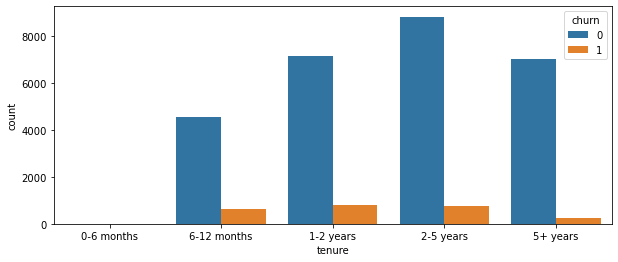

In [50]:
time['timeonnetwork'] = time['aon']/30
time_range= [0,6,12,24,60,10000]
time_labels = ['0-6 months','6-12 months','1-2 years','2-5 years','5+ years']
time['tenure'] = pd.cut(time['timeonnetwork'],time_range,labels = time_labels)
plt.figure(figsize = (10,4))
sns.countplot(x = 'tenure', hue = 'churn', data = time)
plt.show()

##### Customers on network for a longer period of time are less likely to churn

#### * Some other useful variables we can explore to find their relation with churn are average revenue per user(arpu), onnet_mou, offnet_mou, roam_mou, t2t_mou, t2m_mou, last_day_rch_amt

### We compare the average of the good phase(June and July) with the action phase(August) and try to find out how the various variables actually change in these two periods

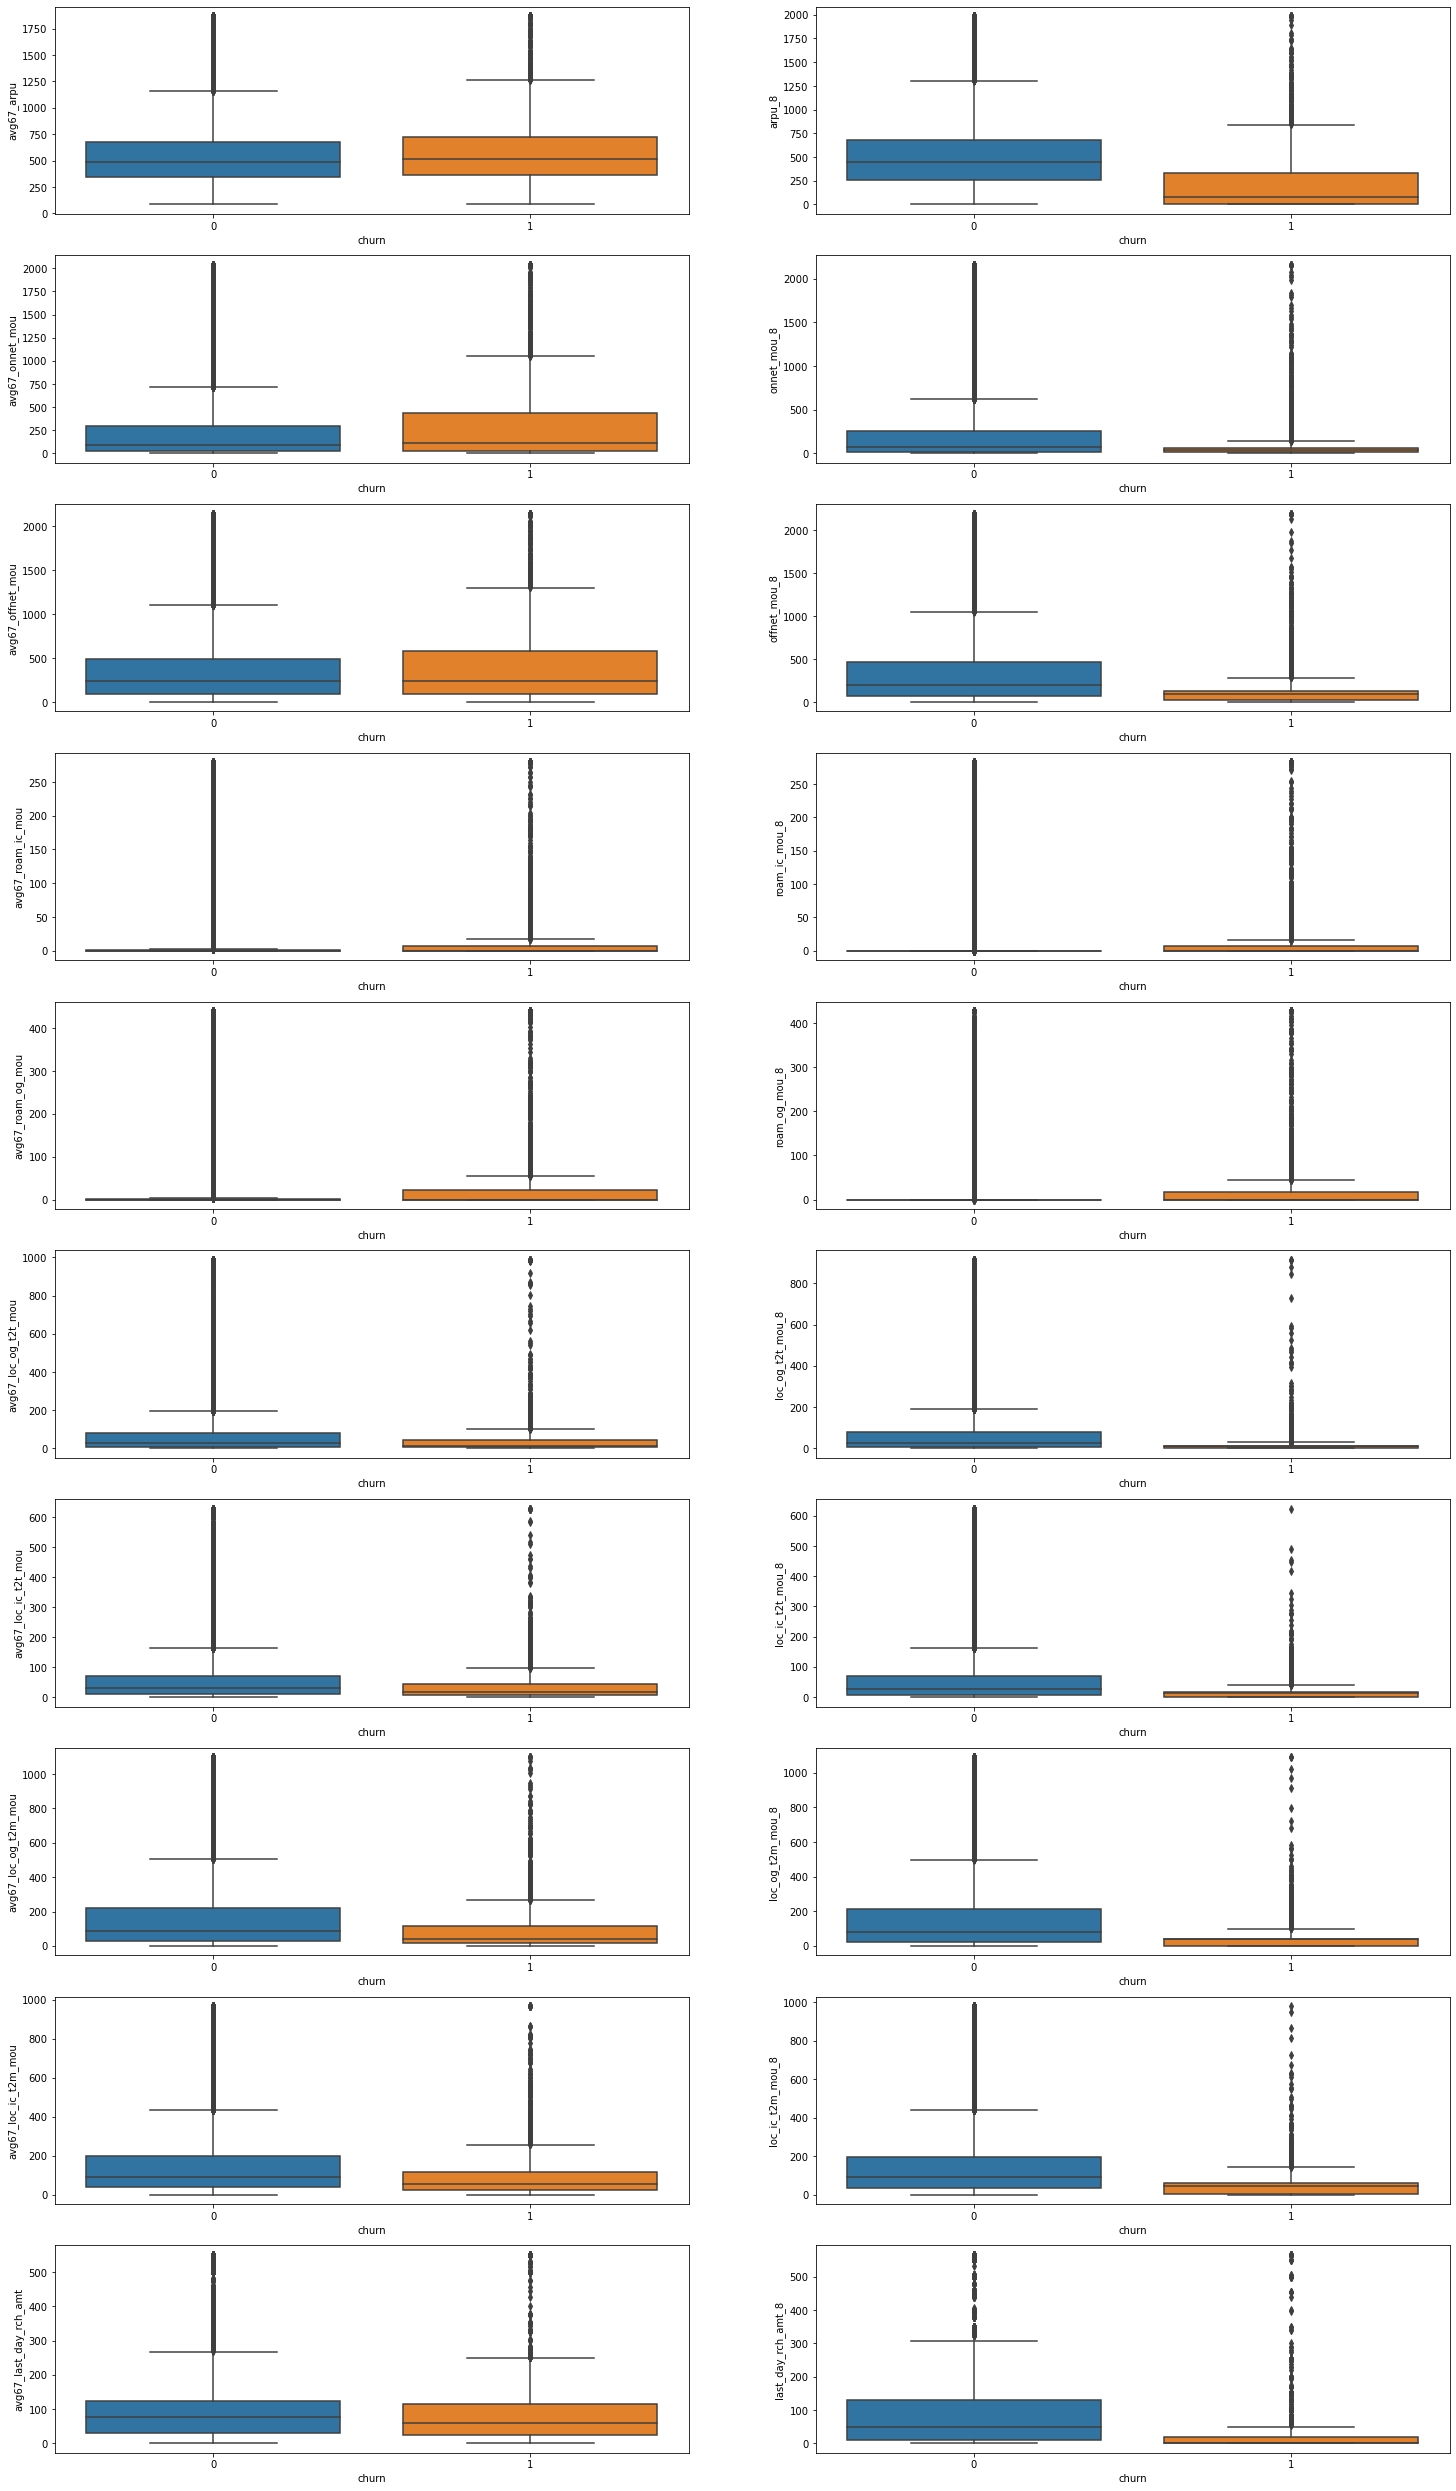

In [51]:
plt.figure(figsize=(25, 45))
plt.subplot(10,2,1)
sns.boxplot(y = 'avg67_arpu', x = 'churn', data = telecom)
plt.subplot(10,2,2)
sns.boxplot(y = 'arpu_8', x = 'churn', data = telecom)
plt.subplot(10,2,3)
sns.boxplot(y = 'avg67_onnet_mou', x = 'churn', data = telecom)
plt.subplot(10,2,4)
sns.boxplot(y = 'onnet_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,5)
sns.boxplot(y = 'avg67_offnet_mou', x = 'churn', data = telecom)
plt.subplot(10,2,6)
sns.boxplot(y = 'offnet_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,7)
sns.boxplot(y = 'avg67_roam_ic_mou', x = 'churn', data = telecom)
plt.subplot(10,2,8)
sns.boxplot(y = 'roam_ic_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,9)
sns.boxplot(y = 'avg67_roam_og_mou', x = 'churn', data = telecom)
plt.subplot(10,2,10)
sns.boxplot(y = 'roam_og_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,11)
sns.boxplot(y = 'avg67_loc_og_t2t_mou', x = 'churn', data = telecom)
plt.subplot(10,2,12)
sns.boxplot(y = 'loc_og_t2t_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,13)
sns.boxplot(y = 'avg67_loc_ic_t2t_mou', x = 'churn', data = telecom)
plt.subplot(10,2,14)
sns.boxplot(y = 'loc_ic_t2t_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,15)
sns.boxplot(y = 'avg67_loc_og_t2m_mou', x = 'churn', data = telecom)
plt.subplot(10,2,16)
sns.boxplot(y = 'loc_og_t2m_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,17)
sns.boxplot(y = 'avg67_loc_ic_t2m_mou', x = 'churn', data = telecom)
plt.subplot(10,2,18)
sns.boxplot(y = 'loc_ic_t2m_mou_8', x = 'churn', data = telecom)
plt.subplot(10,2,19)
sns.boxplot(y = 'avg67_last_day_rch_amt', x = 'churn', data = telecom)
plt.subplot(10,2,20)
sns.boxplot(y = 'last_day_rch_amt_8', x = 'churn', data = telecom)

##### The visuals on the LHS are for the good phase and the ones on the right are for the action phase

### Inference: From the boxplots above, some trends are clearly visible. It is interesting to note that in terms of average revenue per user, the different measures of minutes of usage and the amount recharged on the last day, the people who are churning are clearly having a different behavioral pattern in the action phase from the good phase. In the good phase,  the future churners have higher minutes of usage, generate higher revenue and recharge almost the same as non-churners but in the action phase, the churners are practically not using the network at all i.e.it seems likely that the action phase can provide adequate information on the customers who are likely to churn soon.

### Dummy Encoding

In [52]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_8  onnet_mou_8  \
0              0.0             0.0             0.0   213.8030         0.00   
7              0.0             0.0             0.0  1986.7396        52.29   
8              0.0             0.0             0.0   137.3620        35.08   
21             0.0             0.0             0.0   637.7600        85.14   
23             0.0             0.0             0.0   366.9660        33.58   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0           0.00           0.00           0.00              0.00   
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
21        983.39           0.00           0.00             23.34   
23        205.89           0.00           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0               0.00              0.00              0.00               0.0   
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
21             61.79            876.99              0.00               0.0   
23              0.00             39.61              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0               0.00              0.00              0.00               0.0   
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
21              0.18            101.74              0.00               0.0   
23             13.38             43.91              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2            252.00             252                 252   
7                  7           2341.48             951                 565   
8                 14            120.00              30                  10   
21                27            718.00              50      

### Checking the distribution for the categorical variables

In [53]:
telecom.fb_user_June.value_counts(normalize = True)

1.0        0.517845
Missing    0.441124
0.0        0.041031
Name: fb_user_June, dtype: float64

In [54]:
telecom.fb_user_July.value_counts(normalize = True)

1.0        0.524321
Missing    0.431176
0.0        0.044503
Name: fb_user_July, dtype: float64

In [55]:
telecom.fb_user_8.value_counts(normalize = True)

1.0        0.477314
Missing    0.468000
0.0        0.054686
Name: fb_user_8, dtype: float64

In [56]:
telecom.night_pck_user_June.value_counts(normalize = True)

0.0        0.545288
Missing    0.441124
1.0        0.013588
Name: night_pck_user_June, dtype: float64

In [57]:
telecom.night_pck_user_July.value_counts(normalize = True)

0.0        0.556305
Missing    0.431176
1.0        0.012520
Name: night_pck_user_July, dtype: float64

In [58]:
telecom.night_pck_user_8.value_counts(normalize = True)

0.0        0.520616
Missing    0.468000
1.0        0.011385
Name: night_pck_user_8, dtype: float64

In [59]:
fb_user_June_d = pd.get_dummies(telecom['fb_user_June'], prefix='fb_user_June')

In [60]:
fb_user_July_d = pd.get_dummies(telecom['fb_user_July'], prefix='fb_user_July')

In [61]:
fb_user_8_d = pd.get_dummies(telecom['fb_user_8'], prefix='fb_user_8')

In [62]:
night_pck_user_June_d = pd.get_dummies(telecom['night_pck_user_June'], prefix='night_pck_user_June')

In [63]:
night_pck_user_July_d = pd.get_dummies(telecom['night_pck_user_July'], prefix='night_pck_user_July')

In [64]:
night_pck_user_8_d = pd.get_dummies(telecom['night_pck_user_8'], prefix='night_pck_user_8')

In [65]:
telecom.shape

(29953, 107)

In [66]:
# Drop the old variables as we have created dummies for them
telecom.drop(['fb_user_June','fb_user_July','fb_user_8','night_pck_user_June','night_pck_user_July','night_pck_user_8'], axis =1 , inplace = True)

In [67]:
# Add the new dummy columns to the dataframe
telecom = pd.concat([telecom, fb_user_June_d, fb_user_July_d, fb_user_8_d,
                    night_pck_user_June_d, night_pck_user_July_d, night_pck_user_8_d], axis =1)

#### We will drop  '_Missing' level columns for all the variables and retain the '_0' and  '_1' columns only. It is a binary variable where a '1' means that the customer has used that in that month and a '0' would mean that the customer has either not used or the record is missing.

In [68]:
telecom.drop(['fb_user_June_Missing','fb_user_July_Missing','fb_user_8_Missing',
             'night_pck_user_June_Missing','night_pck_user_July_Missing',
             'night_pck_user_8_Missing'], axis = 1, inplace = True)

In [69]:
# Check the dataset
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_8  onnet_mou_8  \
0              0.0             0.0             0.0   213.8030         0.00   
7              0.0             0.0             0.0  1986.7396        52.29   
8              0.0             0.0             0.0   137.3620        35.08   
21             0.0             0.0             0.0   637.7600        85.14   
23             0.0             0.0             0.0   366.9660        33.58   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0           0.00           0.00           0.00              0.00   
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
21        983.39           0.00           0.00             23.34   
23        205.89           0.00           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0               0.00              0.00              0.00               0.0   
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
21             61.79            876.99              0.00               0.0   
23              0.00             39.61              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0               0.00              0.00              0.00               0.0   
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
21              0.18            101.74              0.00               0.0   
23             13.38             43.91              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2            252.00             252                 252   
7                  7           2341.48             951                 565   
8                 14            120.00              30                  10   
21                27            718.00              50      

#### We now drop some variables which do not seem important from the business point of view as well as do not have any time-stamp in them i.e. do not have a suffix of months and since we are building a model based on the data from June, July and August, we drop them. We also drop total_calls_mou and total_internet which we derived for the calculation of churn!

In [70]:
telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','aon','sep_vbc_3g','total_calls_mou','total_internet'],axis=1,inplace = True)

### Checking the correlation for the continuous variables

In [71]:
cat_cols = ['fb_user_June_1.0','fb_user_July_1.0','fb_user_8_1.0','night_pck_user_June_1.0','night_pck_user_July_1.0','night_pck_user_8_1.0']

In [72]:
num_cols = [column for column in telecom.columns if column not in cat_cols]

(100.5, -0.5)

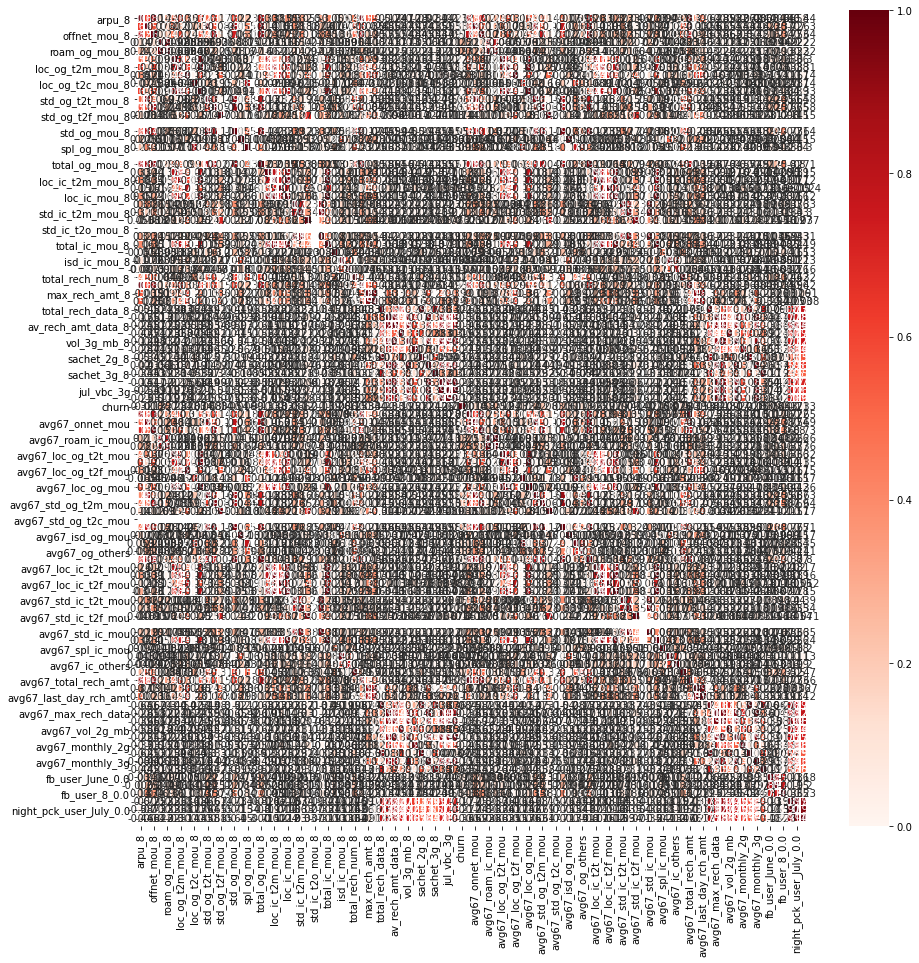

In [73]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr_matrix= telecom[num_cols].corr()
ax = sns.heatmap(corr_matrix.corr(), annot = True, cmap = 'Reds',linewidths=.5,vmin=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [74]:
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [75]:
corr_telecom  = corr.unstack().reset_index()
corr_telecom.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_telecom = corr_telecom.dropna(subset = ['Correlation'])
corr_telecom.Correlation = abs(corr_telecom.Correlation)

In [76]:
corr_telecom.sort_values("Correlation", ascending=False).head(30)

VAR1                   VAR2  Correlation
8249    avg67_total_rech_amt             avg67_arpu     0.972328
3300        total_rech_amt_8                 arpu_8     0.945158
9185         avg67_sachet_2g  avg67_total_rech_data     0.912551
4236             sachet_2g_8      total_rech_data_8     0.912112
7771      avg67_total_ic_mou       avg67_loc_ic_mou     0.904112
2822          total_ic_mou_8           loc_ic_mou_8     0.901885
2220            loc_ic_mou_8       loc_ic_t2m_mou_8     0.885091
7169        avg67_loc_ic_mou   avg67_loc_ic_t2m_mou     0.882062
1001        std_og_t2t_mou_8            onnet_mou_8     0.873467
7673        avg67_std_ic_mou   avg67_std_ic_t2m_mou     0.870096
5950    avg67_std_og_t2t_mou        avg67_onnet_mou     0.866315
2724            std_ic_mou_8       std_ic_t2m_mou_8     0.865650
906             loc_og_mou_8       loc_og_t2m_mou_8     0.861478
5855        avg67_loc_og_mou   avg67_loc_og_t2m_mou     0.849144
8786  avg67_av_rech_amt_data    avg67_max_rech_data     0.846059
1814          total_og_mou_8           std_og_mou_8     0.839402
7122        avg67_loc_ic_mou           loc_ic_mou_8     0.838037
5809        avg67_loc_og_mou           loc_og_mou_8     0.831200
3837      av_rech_amt_data_8        max_rech_data_8     0.824863
6763      avg67_total_og_mou       avg67_std_og_mou     0.824545
5405    avg67_loc_og_t2t_mou       loc_og_t2t_mou_8     0.819780
6920    avg67_loc_ic_t2m_mou       loc_ic_t2m_mou_8     0.819469
7728      avg67_total_ic_mou         total_ic_mou_8     0.816731
5506    avg67_loc_og_t2m_mou       loc_og_t2m_mou_8     0.816130
6051    avg67_std_og_t2m_mou       avg67_offnet_mou     0.813768
1102        std_og_t2m_mou_8           offnet_mou_8     0.810556
6819    avg67_loc_ic_t2t_mou       loc_ic_t2t_mou_8     0.807940
5607    avg67_loc_og_t2f_mou       loc_og_t2f_mou_8     0.799961
7021    avg67_loc_ic_t2f_mou       loc_ic_t2f_mou_8     0.799942
2820          total_ic_mou_8       loc_ic_t2m_mou_8     0.799757

#### We drop some of these highly correlated variables depending on the business relevance. For example, we do not drop the same variable across the good phase and the action phase even if the correlation is higher because we need these to see if the pattern has changed over time.

In [77]:
telecom.drop(['avg67_arpu','arpu_8','avg67_sachet_2g','sachet_2g_8','avg67_loc_ic_mou','loc_ic_mou_8','loc_ic_t2m_mou_8',
             'avg67_loc_ic_t2m_mou','std_og_t2t_mou_8','avg67_std_ic_t2m_mou','avg67_std_og_t2t_mou','std_ic_t2m_mou_8',
             'loc_og_t2m_mou_8','avg67_loc_og_t2m_mou','avg67_std_og_t2t_mou','std_ic_t2m_mou_8','loc_og_t2m_mou_8',
             'avg67_loc_og_t2m_mou','avg67_max_rech_data','std_og_mou_8','max_rech_data_8','avg67_std_og_mou',
             'std_og_t2m_mou_8'],axis = 1, inplace = True)

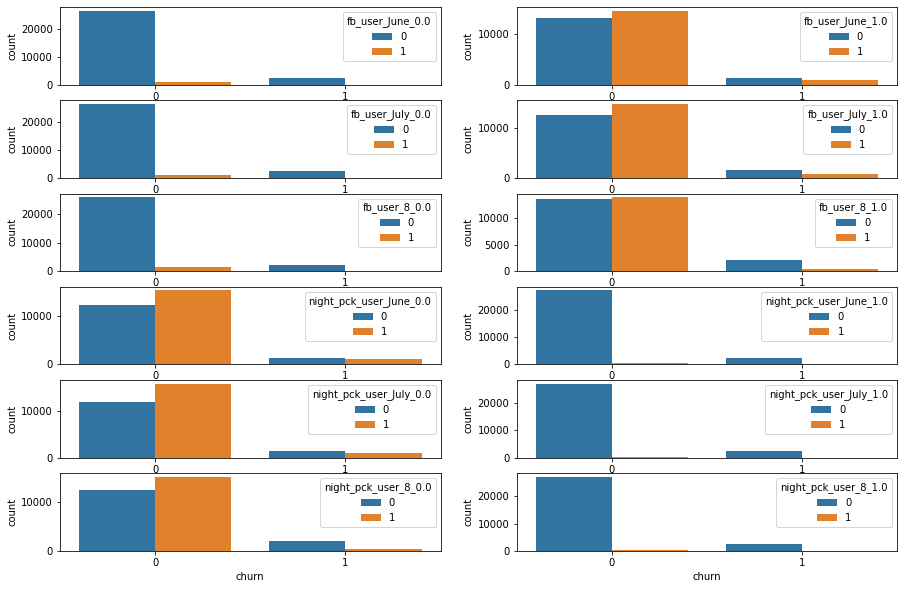

In [78]:
#For Target_1 for REGION_RATING_CLIENT_W_CITY
plt.figure(figsize = (15, 10))
features = ['fb_user_June_0.0','fb_user_June_1.0','fb_user_July_0.0','fb_user_July_1.0','fb_user_8_0.0','fb_user_8_1.0',
            'night_pck_user_June_0.0','night_pck_user_June_1.0','night_pck_user_July_0.0','night_pck_user_July_1.0','night_pck_user_8_0.0','night_pck_user_8_1.0']
for i in enumerate(features):
    plt.subplot(6, 2, i[0]+1)
    sns.countplot(x = 'churn', hue = i[1], data = telecom)
    plt.xlabel('churn')

### Since for some of the categorical variables above, the minority class representation is too low, we will drop these variables. More interstingly, keeping both these variables of the same type in our model would bring a considerable amount of multicollinearity,it's better to drop one of each type.

In [79]:
telecom.drop(['fb_user_June_0.0','fb_user_July_0.0','fb_user_8_0.0','night_pck_user_June_1.0','night_pck_user_July_1.0','night_pck_user_8_1.0'], axis = 1,inplace = True)

In [80]:
# Shape of the dataset that will be used for modelling
telecom.shape

(29953, 81)

### Correlation between target and all other variables

In [81]:
telecom.drop("churn", axis=1).apply(lambda x: x.corr(telecom.churn))

onnet_mou_8               -0.082370
offnet_mou_8              -0.118673
roam_ic_mou_8              0.071207
roam_og_mou_8              0.087299
loc_og_t2t_mou_8          -0.110456
loc_og_t2f_mou_8          -0.092616
loc_og_t2c_mou_8          -0.048664
loc_og_mou_8              -0.155769
std_og_t2f_mou_8          -0.054476
std_og_t2c_mou_8                NaN
isd_og_mou_8              -0.009888
spl_og_mou_8              -0.084735
og_others_8                     NaN
total_og_mou_8            -0.157048
loc_ic_t2t_mou_8          -0.123621
loc_ic_t2f_mou_8          -0.105259
std_ic_t2t_mou_8          -0.066545
std_ic_t2f_mou_8          -0.065808
std_ic_t2o_mou_8                NaN
std_ic_mou_8              -0.087272
total_ic_mou_8            -0.197082
spl_ic_mou_8              -0.070429
isd_ic_mou_8              -0.042313
ic_others_8               -0.048544
total_rech_num_8          -0.164349
total_rech_amt_8          -0.209940
max_rech_amt_8            -0.154659
last_day_rch_amt_8        -0

#### None of the correlation value for the target variable with the explanatory variables is high. So we can retain all these variables. 

In [82]:
telecom.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0          0.00          0.00           0.00           0.00              0.00   
7         52.29        325.91          31.64          38.06             40.28   
8         35.08        136.48           0.00           0.00             12.49   
21        85.14        983.39           0.00           0.00             23.34   
23        33.58        205.89           0.00           0.00             33.58   

    loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00          0.00              0.00   
7              53.23              0.00        255.79             16.68   
8               0.00              7.15         63.04              0.00   
21              1.58              0.00        129.74              0.00   
23              0.00             17.71        182.14              0.00   

    std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0                0.0          0.00          0.00          0.0            0.00   
7                0.0         10.01          6.50          0.0          350.16   
8                0.0          0.00         10.23          0.0          171.56   
21               0.0          0.00          0.00          0.0         1068.54   
23               0.0          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  \
0               0.16              1.15              0.00              0.00   
7              27.31             39.53             30.39             22.21   
8               0.31              0.00              0.10              0.00   
21             19.54             10.39              0.18              0.00   
23             76.64              0.71             13.38              0.00   

    std_ic_t2o_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
0                0.0          0.00            5.44           0.0   
7                0.0        193.94          428.74           0.0   
8                0.0          0.75           16.54           0.0   
21               0.0        101.93          261.04           0.0   
23               0.0         57.29          298.33           0.0   

    isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
0           0.00         0.00                 2            252.00   
7          31.59        15.14                 7           2341.48   
8           0.00         0.00                14            120.00   
21          0.00         0.00                27            718.00   
23          3.74        13.06                 4            439.00   

    max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  av_rech_amt_data_8  \
0              252                 252                1.0               252.0   
7              951                 565                0.0                 0.0   
8               30                  10                3.0                69.0   
21              50                  50                0.0                 0.0   
23             179                   0                2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  monthly_2g_8  monthly_3g_8  sachet_3g_8  \
0          5.75       109.61             0             1            0   
7          0.00         0.00             0             0            0   
8          0.03        11.94             0             0            0   
21         0.00         0.00             0             0            0   
23         0.01      1009.92             0             1            1   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  avg67_onnet_mou  \
0        30.40        0.00      101.20      1            33.32   
7        57.74       19.38       18.74      1            56.26   
8        21.03      910.65      122.16      0           382.36   
21        0.00        0.00        0.00      0           117.26   
23       40.45       51.86        0.

## Step 5: MODEL BUILDING

## Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variable to X
X = telecom.drop('churn', axis=1)

X.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0          0.00          0.00           0.00           0.00              0.00   
7         52.29        325.91          31.64          38.06             40.28   
8         35.08        136.48           0.00           0.00             12.49   
21        85.14        983.39           0.00           0.00             23.34   
23        33.58        205.89           0.00           0.00             33.58   

    loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00          0.00              0.00   
7              53.23              0.00        255.79             16.68   
8               0.00              7.15         63.04              0.00   
21              1.58              0.00        129.74              0.00   
23              0.00             17.71        182.14              0.00   

    std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0                0.0          0.00          0.00          0.0            0.00   
7                0.0         10.01          6.50          0.0          350.16   
8                0.0          0.00         10.23          0.0          171.56   
21               0.0          0.00          0.00          0.0         1068.54   
23               0.0          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  \
0               0.16              1.15              0.00              0.00   
7              27.31             39.53             30.39             22.21   
8               0.31              0.00              0.10              0.00   
21             19.54             10.39              0.18              0.00   
23             76.64              0.71             13.38              0.00   

    std_ic_t2o_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
0                0.0          0.00            5.44           0.0   
7                0.0        193.94          428.74           0.0   
8                0.0          0.75           16.54           0.0   
21               0.0        101.93          261.04           0.0   
23               0.0         57.29          298.33           0.0   

    isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
0           0.00         0.00                 2            252.00   
7          31.59        15.14                 7           2341.48   
8           0.00         0.00                14            120.00   
21          0.00         0.00                27            718.00   
23          3.74        13.06                 4            439.00   

    max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  av_rech_amt_data_8  \
0              252                 252                1.0               252.0   
7              951                 565                0.0                 0.0   
8               30                  10                3.0                69.0   
21              50                  50                0.0                 0.0   
23             179                   0                2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  monthly_2g_8  monthly_3g_8  sachet_3g_8  \
0          5.75       109.61             0             1            0   
7          0.00         0.00             0             0            0   
8          0.03        11.94             0             0            0   
21         0.00         0.00             0             0            0   
23         0.01      1009.92             0             1            1   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  avg67_onnet_mou  avg67_offnet_mou  \
0        30.40        0.00      101.20            33.32           94.0225   
7        57.74       19.38       18.74            56.26          510.2950   
8        21.03      910.65      122.16           382.36           87.6450   
21        0.00        0.00        0.00           117.26   

In [85]:
# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [86]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [87]:
from collections import Counter 
print(sorted(Counter(y_train).items()))

[(0, 19264), (1, 1703)]


In [88]:
print(sorted(Counter(y_test).items()))

[(0, 8256), (1, 730)]


### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['fb_user_June_1.0','fb_user_July_1.0','fb_user_8_1.0',
            'night_pck_user_June_0.0','night_pck_user_July_0.0','night_pck_user_8_0.0']
target_col = ['churn']

X_train[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in telecom.columns if col not in cat_cols + target_col]])

X_train.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
51883    -0.578963     -0.802597      -0.251825      -0.264323   
35039    -0.049849      2.484476       0.337921       0.288714   
35200    -0.386892     -0.732327      -0.251825      -0.264323   
42030     0.196612      0.845644      -0.251825      -0.264323   
3762     -0.482298      1.347116      -0.251825      -0.264323   

       loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
51883         -0.513833         -0.407582         -0.337718     -0.750300   
35039          0.790405          0.214918         -0.337718      3.644093   
35200          0.025365         -0.289415         -0.337718     -0.418269   
42030          1.639108          5.388001         -0.337718      2.195371   
3762          -0.240091         -0.316447         -0.337718      2.202279   

       std_og_t2f_mou_8  std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  \
51883         -0.233015               0.0     -0.147449     -0.494244   
35039         -0.166948               0.0     -0.147449     -0.354967   
35200         -0.233015               0.0     -0.147449     -0.494244   
42030         -0.007108               0.0     -0.147449     -0.197233   
3762          -0.233015               0.0     -0.147449     -0.494244   

       og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  \
51883          0.0       -0.854977         -0.490223         -0.449822   
35039          0.0        1.549926         -0.338106         -0.332455   
35200          0.0       -0.690779          0.296552          0.416753   
42030          0.0        0.691655          1.327049          5.934153   
3762           0.0        0.596556          0.886242          0.407405   

       std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
51883         -0.363029         -0.281112               0.0     -0.479646   
35039         -0.108012         -0.281112               0.0     -0.043635   
35200         -0.363029          0.786849               0.0     -0.369746   
42030         -0.363029          0.285561               0.0     -0.090045   
3762          -0.363029         -0.256203               0.0     -0.477666   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
51883       -0.831346     -0.265582     -0.250296    -0.254993   
35039        1.308061     -0.265582     -0.043537    -0.254993   
35200       -0.191023     -0.265582     -0.250296    -0.086643   
42030        2.218429     -0.265582     -0.250296    -0.234378   
3762         0.105396      2.500244     -0.250296    -0.114129   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
51883         -0.564457         -0.772805       -0.019843           -0.818424   
35039         -0.097608          0.927412        0.639185            0.109894   
35200          0.019104         -0.664234       -0.823034           -0.539929   
42030         -0.564457         -0.390636       -0.184600            0.388389   
3762          -0.097608         -0.138752       -0.019843           -0.818424   

       total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
51883          -0.217060            0.205113     1.479844    -0.469946   
35039          -0.217060           -0.542944    -0.403793    -0.469946   
35200          -0.607745           -0.687917    -0.403793    -0.469946   
42030          -0.607745           -0.687917    -0.403793    -0.469946   
3762           -0.217060            0.205113    -0.360540    -0.092617   

       monthly_2g_8  monthly_3g_8  sachet_3g_8  aug_vbc_3g  jul_vbc_3g  \
51883       2.12765     -0.370666    -0.259248   -0.450804   -0.451987   
35039      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
35200      -0.38774     -0.370666    -0.259248   -0.450804   -0.347303   
42030      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
3762        2.12765     -0.370666    -0.259248    0.202748   -0.018893   

       jun_vbc_3g  avg67_o

### Transforming the test set

In [91]:
# Scale the test set
X_test[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in telecom.columns if col not in cat_cols + target_col]])

#### The target variable is imbalanced. We need to treat it in the first place using the 'SMOTE' oversampling technique

In [92]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_smote_train, y_smote_train = smt.fit_resample(X_train, y_train)
len(X_smote_train)

38528

In [93]:
from collections import Counter 
print(sorted(Counter(y_smote_train).items()))

[(0, 19264), (1, 19264)]


## LOGISTIC REGRESSION

### Without Feature Selection

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lreg = LogisticRegression()
lreg.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [95]:
pred_probs_test = lreg.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, pred_probs_test)

0.8954537007539557

### AUROC is 89.5%. 

In [96]:
pred_test = lreg.predict_proba(X_test)
y_pred = lreg.predict(X_test)

In [97]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8373024705096818
F1 score:  0.4487179487179487
Recall:  0.815068493150685
Precision:  0.309573361082206

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      8256
           1       0.31      0.82      0.45       730

    accuracy                           0.84      8986
   macro avg       0.65      0.83      0.68      8986
weighted avg       0.93      0.84      0.87      8986


 confussion matrix:
 [[6929 1327]
 [ 135  595]]


#### Since we are looking for a high recall, a recall of 81.5 % is quite satisfactory. The AUROC is 89.5% as well. We will now try to reduce the number of explanatory variables and fit the logistic regression and see how the performance metrics change!

### With Feature Selection

### Using RFE

In [98]:
lr = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)   #RFE selects 15 most important features for us
rfe = rfe.fit(X_smote_train, y_smote_train)

In [99]:
rfe.support_

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [100]:
list(zip(X_smote_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_8', False, 48),
 ('loc_og_t2t_mou_8', False, 18),
 ('loc_og_t2f_mou_8', False, 12),
 ('loc_og_t2c_mou_8', False, 33),
 ('loc_og_mou_8', False, 19),
 ('std_og_t2f_mou_8', False, 9),
 ('std_og_t2c_mou_8', False, 62),
 ('isd_og_mou_8', False, 58),
 ('spl_og_mou_8', False, 34),
 ('og_others_8', False, 64),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 10),
 ('loc_ic_t2f_mou_8', False, 50),
 ('std_ic_t2t_mou_8', False, 54),
 ('std_ic_t2f_mou_8', False, 43),
 ('std_ic_t2o_mou_8', False, 66),
 ('std_ic_mou_8', False, 11),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 7),
 ('ic_others_8', False, 60),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 44),
 ('max_rech_amt_8', False, 23),
 ('last_day_rch_amt_8', False, 4),
 ('total_rech_data_8', True, 1),
 ('av_rech_amt_data_8', False, 35),
 ('vol_2g_mb_8', False, 15),
 ('vol_3g_mb_8', F

In [101]:
col = X_smote_train.columns[rfe.support_]

In [102]:
X_smote_train.columns[~rfe.support_]

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg67_onnet_mou', 'avg67_roam_ic_mou', 'avg67_roam_og_mou',
       'avg67_loc_og_t2t_mou', 'avg67_loc_og_t2f_mou', 'avg67_loc_og_t2c_mou',
       'avg67_std_og_t2m_mou', 'avg67_std_og_t2f_mou', 'avg67_std_og_t2c_mou',
       'avg67_isd_og_mou', 'avg67_spl_og_mou', 'avg67_og_others',
       'avg67_total_og_mou', 'avg67_loc_ic_t2t_mou', 'avg67_loc_ic_t2f_mou',
       'avg67_std_ic_t2

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_smote_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote_train[col].values, i) for i in range(X_smote_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2            total_og_mou_8  20.50
1              offnet_mou_8   9.55
14     night_pck_user_8_0.0   8.75
0               onnet_mou_8   8.44
11            fb_user_8_1.0   8.34
13  night_pck_user_July_0.0   3.50
12  night_pck_user_June_0.0   3.22
3            total_ic_mou_8   3.03
6         total_rech_data_8   2.65
9        avg67_total_ic_mou   2.63
10    avg67_total_rech_data   2.26
5          total_rech_num_8   2.02
7          avg67_offnet_mou   1.74
8          avg67_loc_og_mou   1.59
4              spl_ic_mou_8   1.06

#### We will drop the column 'total_og_mou_8' because of its high VIF!

In [105]:
col = col.drop('total_og_mou_8', 1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_data_8', 'avg67_offnet_mou',
       'avg67_loc_og_mou', 'avg67_total_ic_mou', 'avg67_total_rech_data',
       'fb_user_8_1.0', 'night_pck_user_June_0.0', 'night_pck_user_July_0.0',
       'night_pck_user_8_0.0'],
      dtype='object')

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_smote_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote_train[col].values, i) for i in range(X_smote_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13     night_pck_user_8_0.0  8.75
10            fb_user_8_1.0  8.33
12  night_pck_user_July_0.0  3.50
11  night_pck_user_June_0.0  3.21
2            total_ic_mou_8  2.97
5         total_rech_data_8  2.65
8        avg67_total_ic_mou  2.62
9     avg67_total_rech_data  2.25
1              offnet_mou_8  2.19
4          total_rech_num_8  2.00
6          avg67_offnet_mou  1.74
7          avg67_loc_og_mou  1.59
0               onnet_mou_8  1.36
3              spl_ic_mou_8  1.06

#### We will drop the column 'night_pck_user_8_0.0' because of its high VIF!

In [107]:
col = col.drop('night_pck_user_8_0.0', 1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_data_8', 'avg67_offnet_mou',
       'avg67_loc_og_mou', 'avg67_total_ic_mou', 'avg67_total_rech_data',
       'fb_user_8_1.0', 'night_pck_user_June_0.0', 'night_pck_user_July_0.0'],
      dtype='object')

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_smote_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote_train[col].values, i) for i in range(X_smote_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  night_pck_user_July_0.0  3.35
11  night_pck_user_June_0.0  3.11
10            fb_user_8_1.0  3.09
2            total_ic_mou_8  2.97
8        avg67_total_ic_mou  2.62
5         total_rech_data_8  2.57
1              offnet_mou_8  2.18
9     avg67_total_rech_data  2.18
4          total_rech_num_8  2.00
6          avg67_offnet_mou  1.73
7          avg67_loc_og_mou  1.59
0               onnet_mou_8  1.35
3              spl_ic_mou_8  1.06

#### All the VIF values being satisfactory, we shall use these 13 variables to build our final Logistic Regression Model.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logrf = LogisticRegression()
logrf.fit(X_smote_train[col], y_smote_train)

LogisticRegression()

In [110]:
pred_probs_test_rf = logrf.predict_proba(X_test[col])[:,1]
round(metrics.roc_auc_score(y_test, pred_probs_test_rf),2)

0.88

#### AUROC is 88%, not much lesser than the Logistic model with all the features

In [111]:
pred_test_rf = logrf.predict_proba(X_test[col])
y_pred_rf = logrf.predict(X_test[col])

In [112]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.8170487424883152
F1 score:  0.41494661921708187
Recall:  0.7986301369863014
Precision:  0.28028846153846154

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8256
           1       0.28      0.80      0.41       730

    accuracy                           0.82      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.82      0.85      8986


 confussion matrix:
 [[6759 1497]
 [ 147  583]]


#### The number of FN's is very low, a good point to start off

In [113]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test_rf)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [114]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.88151406697993


In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

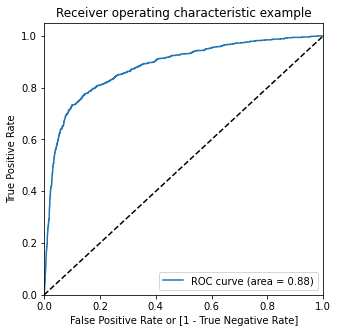

In [116]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

### AUROC is 88%, slightly lower than the Logistic model with all features

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head(100)

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0       0    0.086326    1    0    0    0    0    0    0    0    0    0
1       0    0.542124    1    1    1    1    1    1    0    0    0    0
2       0    0.000016    1    0    0    0    0    0    0    0    0    0
3       1    0.943790    1    1    1    1    1    1    1    1    1    1
4       0    0.067583    1    0    0    0    0    0    0    0    0    0
5       0    0.029431    1    0    0    0    0    0    0    0    0    0
6       0    0.193114    1    1    0    0    0    0    0    0    0    0
7       0    0.014681    1    0    0    0    0    0    0    0    0    0
8       0    0.450057    1    1    1    1    1    0    0    0    0    0
9       0    0.669160    1    1    1    1    1    1    1    0    0    0
10      0    0.001892    1    0    0    0    0    0    0    0    0    0
11      1    0.831006    1    1    1    1    1    1    1    1    1    0
12      0    0.274331    1    1    1    0    0    0    0    0    0    0
13      1    0.084043    1    0    0    0    0    0    0    0    0    0
14      0    0.170669    1    1    0    0    0    0    0    0    0    0
15      0    0.480776    1    1    1    1    1    0    0    0    0    0
16      0    0.069498    1    0    0    0    0    0    0    0    0    0
17      0    0.074391    1    0    0    0    0    0    0    0    0    0
18      0    0.004926    1    0    0    0    0    0    0    0    0    0
19      0    0.563897    1    1    1    1    1    1    0    0    0    0
20      0    0.098519    1    0    0    0    0    0    0    0    0    0
21      0    0.094425    1    0    0    0    0    0    0    0    0    0
22      0    0.029731    1    0    0    0    0    0    0    0    0    0
23      0    0.670520    1    1    1    1    1    1    1    0    0    0
24      0    0.456961    1    1    1    1    1    0    0    0    0    0
25      0    0.817506    1    1    1    1    1    1    1    1    1    0
26      0    0.416382    1    1    1    1    1    0    0    0    0    0
27      1    0.971822    1    1    1    1    1    1    1    1    1    1
28      0    0.584508    1    1    1    1    1    1    0    0    0    0
29      1    0.781422    1    1    1    1    1    1    1    1    0    0
30      0    0.015848    1    0    0    0    0    0    0    0    0    0
31      0    0.595785    1    1    1    1    1    1    0    0    0    0
32      0    0.113968    1    1    0    0    0    0    0    0    0    0
33      0    0.002728    1    0    0    0    0    0    0    0    0    0
34      0    0.549828    1    1    1    1    1    1    0    0    0    0
35      0    0.502706    1    1    1    1    1    1    0    0    0    0
36      0    0.094054    1    0    0    0    0    0    0    0    0    0
37      0    0.001283    1    0    0    0    0    0    0    0    0    0
38      0    0.011390    1    0    0    0    0    0    0    0    0    0
39      1    0.686064    1    1    1    1    1    1    1    0    0    0
40      0    0.170832    1    1    0    0    0    0    0    0    0    0
41      0    0.132383    1    1    0    0    0    0    0    0    0    0
42      0    0.035505    1    0    0    0    0    0    0    0    0    0
43      0    0.181628    1    1    0    0    0    0    0    0    0    0
44      0    0.103531    1    1    0    0    0    0    0    0    0    0
45      0    0.153932    1    1    0    0    0    0    0    0    0    0
46      1    0.856875    1    1    1    1    1    1    1    1    1    0
47      1    0.696651    1    1    1    1    1    1    1    0    0    0
48      0    0.082281    1    0    0    0    0    0    0    0    0    0
49      0    0.126148    1    1    0    0    0    0    0    0    0    0
50      1    0.767722    1    1    1    1    1    1    1    1    0    0
51      0    0.038754    1    0    0    0    0    0    0    0    0    0
52      0    0.573637    1    1    1    1    1    1    0    0    0    0
53      0    0.382203    1    1    1    1    0    0    0    0    0    0
54      0    0.029258    1    0    0    0   

In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081237  1.000000  0.000000
0.1   0.1  0.456488  0.950685  0.412791
0.2   0.2  0.592143  0.916438  0.563469
0.3   0.3  0.690296  0.875342  0.673934
0.4   0.4  0.761518  0.832877  0.755208
0.5   0.5  0.817049  0.798630  0.818677
0.6   0.6  0.860116  0.756164  0.869307
0.7   0.7  0.902626  0.693151  0.921148
0.8   0.8  0.925773  0.565753  0.957607
0.9   0.9  0.927220  0.249315  0.987161


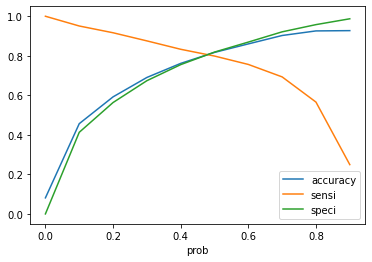

In [119]:
# Cutoff between accuracy, sensitivity/recall and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [120]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.4836276917953672]


In [121]:
#Creating new column 'predicted' with 1 if Churn_Prob>0.48 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.48 else 0)

y_pred_final.pred_churn.value_counts(normalize = True)

0    0.757289
1    0.242711
Name: pred_churn, dtype: float64

In [122]:
y_pred_final = y_pred_final[['churn','churn_prob','pred_churn']]
y_pred_final

churn    churn_prob  pred_churn
0         0  8.632649e-02           0
1         0  5.421242e-01           1
2         0  1.578228e-05           0
3         1  9.437898e-01           1
4         0  6.758310e-02           0
5         0  2.943099e-02           0
6         0  1.931137e-01           0
7         0  1.468145e-02           0
8         0  4.500568e-01           0
9         0  6.691596e-01           1
10        0  1.892492e-03           0
11        1  8.310061e-01           1
12        0  2.743315e-01           0
13        1  8.404299e-02           0
14        0  1.706686e-01           0
15        0  4.807757e-01           1
16        0  6.949820e-02           0
17        0  7.439087e-02           0
18        0  4.925824e-03           0
19        0  5.638969e-01           1
20        0  9.851896e-02           0
21        0  9.442501e-02           0
22        0  2.973076e-02           0
23        0  6.705201e-01           1
24        0  4.569612e-01           0
25        0  8.175060e-01           1
26        0  4.163824e-01           0
27        1  9.718223e-01           1
28        0  5.845079e-01           1
29        1  7.814223e-01           1
30        0  1.584774e-02           0
31        0  5.957848e-01           1
32        0  1.139684e-01           0
33        0  2.728295e-03           0
34        0  5.498282e-01           1
35        0  5.027057e-01           1
36        0  9.405384e-02           0
37        0  1.283493e-03           0
38        0  1.138956e-02           0
39        1  6.860642e-01           1
40        0  1.708316e-01           0
41        0  1.323827e-01           0
42        0  3.550459e-02           0
43        0  1.816285e-01           0
44        0  1.035311e-01           0
45        0  1.539319e-01           0
46        1  8.568751e-01           1
47        1  6.966512e-01           1
48        0  8.228059e-02           0
49        0  1.261482e-01           0
50        1  7.677225e-01           1
51        0  3.875420e-02           0
52        0  5.736373e-01           1
53        0  3.822028e-01           0
54        0  2.925788e-02           0
55        0  4.350887e-02           0
56        0  1.891431e-01           0
57        0  5.620923e-03           0
58        0  6.416653e-01           1
59        0  8.035941e-01           1
60        0  9.853806e-02           0
61        0  5.890710e-03           0
62        0  9.009942e-01           1
63        0  9.594950e-02           0
64        0  6.423245e-01           1
65        0  3.393517e-01           0
66        0  8.731757e-02           0
67        0  2.136015e-01           0
68        0  4.102402e-01           0
69        0  9.541729e-01           1
70        0  3.260935e-01           0
71        0  3.236577e-01           0
72        0  3.701864e-01           0
73        0  7.532539e-02           0
74        0  4.635810e-01           0
75        0  4.201840e-02           0
76        0  3.703138e-01           0
77        0  3.567309e-02           0
78        0  4.546104e-01           0
79        0  1.211327e-01           0
80        1  8.008939e-01           1
81        1  8.315902e-01           1
82        0  5.851043e-01           1
83        0  1.276703e-01           0
84        0  8.306228e-01           1
85        0  1.248234e-03           0
86        0  2.979953e-02           0
87        0  1.851296e-01           0
88        0  1.235628e-01           0
89        1  5.963075e-02           0
90        0  2.105033e-01           0
91        1  7.743199e-01           1
92        0  1.068843e-01           0
93        1  4.379535e-01           0
94        0  3.138083e-02           0
95        0  2.872582e-02           0
96        0  1.364941e-01           0
97        0  2.299210e-01           0
98        0  1.962519e-03           0
99        0  4.291328e-01           0
100       0  1.070951e-02           0
101       0  4.915322e-01           1
102       0  1.461321e-01           0
103       0  7.256558e-01           1
104       1  9.7

In [123]:
# Recall
recall_score(y_pred_final.churn, y_pred_final.pred_churn)

0.8082191780821918

### Recall is around 81%, the most important metric for our problem

In [124]:
# Precision
precision_score(y_pred_final.churn, y_pred_final.pred_churn)

0.27051811095827605

#### The number of false positives is high, but given our business problem, reducing the number of false negatives seems to be of utmost importance. Predicting a non-churner as a churner is still fine but labelling a churner as a non-churner will lead to that customer actually churning resulting in huge loss of revenue

### ** Logistic Regression with RFE gives us a sensitivity/recall value of 80.8, just a bit less than the Logistic Regression model with all the features which gave us 81.5! So, in order to reduce the computation time and to better understand the important variables from an angle of reduced dimensionality, we will stick to Logistic Regression with RFE which has 13 features finally. If we go ahead and find that Decision Trees and Random Forest give us a lower recall value, we will see the importance of features from the final model of Logistic Regression with RFE!

## DECISION TREES

In [119]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [120]:
# Scaling the train set
scaler = StandardScaler()

cat_cols = ['fb_user_June_1.0','fb_user_July_1.0','fb_user_8_1.0',
            'night_pck_user_June_0.0','night_pck_user_July_0.0','night_pck_user_8_0.0']
target_col = ['churn']

X_train[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in telecom.columns if col not in cat_cols + target_col]])

X_train.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
51883    -0.578963     -0.802597      -0.251825      -0.264323   
35039    -0.049849      2.484476       0.337921       0.288714   
35200    -0.386892     -0.732327      -0.251825      -0.264323   
42030     0.196612      0.845644      -0.251825      -0.264323   
3762     -0.482298      1.347116      -0.251825      -0.264323   

       loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
51883         -0.513833         -0.407582         -0.337718     -0.750300   
35039          0.790405          0.214918         -0.337718      3.644093   
35200          0.025365         -0.289415         -0.337718     -0.418269   
42030          1.639108          5.388001         -0.337718      2.195371   
3762          -0.240091         -0.316447         -0.337718      2.202279   

       std_og_t2f_mou_8  std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  \
51883         -0.233015               0.0     -0.147449     -0.494244   
35039         -0.166948               0.0     -0.147449     -0.354967   
35200         -0.233015               0.0     -0.147449     -0.494244   
42030         -0.007108               0.0     -0.147449     -0.197233   
3762          -0.233015               0.0     -0.147449     -0.494244   

       og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  \
51883          0.0       -0.854977         -0.490223         -0.449822   
35039          0.0        1.549926         -0.338106         -0.332455   
35200          0.0       -0.690779          0.296552          0.416753   
42030          0.0        0.691655          1.327049          5.934153   
3762           0.0        0.596556          0.886242          0.407405   

       std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
51883         -0.363029         -0.281112               0.0     -0.479646   
35039         -0.108012         -0.281112               0.0     -0.043635   
35200         -0.363029          0.786849               0.0     -0.369746   
42030         -0.363029          0.285561               0.0     -0.090045   
3762          -0.363029         -0.256203               0.0     -0.477666   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
51883       -0.831346     -0.265582     -0.250296    -0.254993   
35039        1.308061     -0.265582     -0.043537    -0.254993   
35200       -0.191023     -0.265582     -0.250296    -0.086643   
42030        2.218429     -0.265582     -0.250296    -0.234378   
3762         0.105396      2.500244     -0.250296    -0.114129   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
51883         -0.564457         -0.772805       -0.019843           -0.818424   
35039         -0.097608          0.927412        0.639185            0.109894   
35200          0.019104         -0.664234       -0.823034           -0.539929   
42030         -0.564457         -0.390636       -0.184600            0.388389   
3762          -0.097608         -0.138752       -0.019843           -0.818424   

       total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
51883          -0.217060            0.205113     1.479844    -0.469946   
35039          -0.217060           -0.542944    -0.403793    -0.469946   
35200          -0.607745           -0.687917    -0.403793    -0.469946   
42030          -0.607745           -0.687917    -0.403793    -0.469946   
3762           -0.217060            0.205113    -0.360540    -0.092617   

       monthly_2g_8  monthly_3g_8  sachet_3g_8  aug_vbc_3g  jul_vbc_3g  \
51883       2.12765     -0.370666    -0.259248   -0.450804   -0.451987   
35039      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
35200      -0.38774     -0.370666    -0.259248   -0.450804   -0.347303   
42030      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
3762        2.12765     -0.370666    -0.259248    0.202748   -0.018893   

       jun_vbc_3g  avg67_o

In [121]:
# Scaling the test set
X_test[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in telecom.columns if col not in cat_cols + target_col]])

#### Balancing the data imbalance in the train set

In [122]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_smote_train, y_smote_train = smt.fit_resample(X_train, y_train)
len(X_smote_train)

38528

#### We use Lasso to select the important features to use in our model

In [123]:
# Using Lasso to select the features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_smote_train, y_smote_train)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_smote_train)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(38528, 40)
[ 3  5  7  8 11 13 15 17 20 21 24 27 28 30 32 35 38 41 43 44 46 49 51 55
 58 59 61 62 63 64 67 68 69 71 72 73 76 77 78 79]


In [124]:
# feature vector for decision tree
lasso_features = list(telecom.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'churn', 'avg67_roam_ic_mou', 'avg67_loc_og_t2t_mou', 'avg67_loc_og_t2f_mou', 'avg67_loc_og_mou', 'avg67_std_og_t2c_mou', 'avg67_spl_og_mou', 'avg67_loc_ic_t2f_mou', 'avg67_std_ic_t2o_mou', 'avg67_std_ic_mou', 'avg67_spl_ic_mou', 'avg67_isd_ic_mou', 'avg67_ic_others', 'avg67_total_rech_num', 'avg67_last_day_rch_amt', 'avg67_total_rech_data', 'avg67_av_rech_amt_data', 'avg67_vol_3g_mb', 'avg67_monthly_2g', 'avg67_monthly_3g', 'fb_user_July_1.0', 'fb_user_8_1.0', 'night_pck_user_June_0.0', 'night_pck_user_July_0.0']


In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_smote_train)

DecisionTreeClassifier(max_depth=5)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8256
           1       0.38      0.78      0.51       730

    accuracy                           0.88      8986
   macro avg       0.68      0.83      0.72      8986
weighted avg       0.93      0.88      0.90      8986



In [127]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Recall :',recall_score(y_test,y_pred1))

[[7310  946]
 [ 161  569]]
Decision Tree - Recall : 0.7794520547945205


In [128]:
from sklearn.metrics import make_scorer
scorers = {'recall_score': make_scorer(recall_score)}
refit_score = 'recall_score'

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

In [130]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.086159      0.003255         0.003802        0.000405   
1       0.151799      0.004438         0.004186        0.000730   
2       0.217828      0.005977         0.004198        0.000971   
3       0.274678      0.008082         0.004390        0.000488   
4       0.348469      0.012310         0.004394        0.000485   

  param_max_depth            params  split0_test_recall_score  \
0               1  {'max_depth': 1}                  0.723332   
1               2  {'max_depth': 2}                  0.814430   
2               3  {'max_depth': 3}                  0.815728   
3               4  {'max_depth': 4}                  0.804827   
4               5  {'max_depth': 5}                  0.842460   

   split1_test_recall_score  split2_test_recall_score  \
0                  0.742798                  0.719699   
1                  0.845056                  0.843499   
2                  0.854399                  0.869971   
3                  0.863223                  0.840384   
4                  0.889177                  0.913055   

   split3_test_recall_score  split4_test_recall_score  mean_test_recall_score  \
0                  0.750000                  0.740981                0.735362   
1                  0.846054                  0.849468                0.839701   
2                  0.855400                  0.871269                0.853354   
3                  0.839045                  0.839606                0.837417   
4                  0.880841                  0.911757                0.887458   

   std_test_recall_score  rank_test_recall_score  split0_train_recall_score  \
0               0.011757                      39                   0.748297   
1               0.012786                      37                   0.847576   
2               0.020090                      36                   0.858997   
3               0.018678                      38                   0.864772   
4               0.025757                      34                   0.894361   

   split1_train_recall_score  split2_train_recall_score  \
0                   0.744533                   0.717085   
1                   0.840179                   0.833690   
2                   0.849523                   0.858348   
3                   0.850367                   0.821037   
4                   0.877944                   0.910389   

   split3_train_recall_score  split4_train_recall_score  \
0                   0.742733                   0.733242   
1                   0.839930                   0.836610   
2                   0.850766                   0.863020   
3                   0.832338                   0.828240   
4                   0.876071                   0.902991   

   mean_train_recall_score  std_train_recall_score  
0                 0.737178                0.011205  
1                 0.839597                0.004646  
2                 0.856131                0.005158  
3                 0.839351                0.015973  
4                 0.892351                0.013529

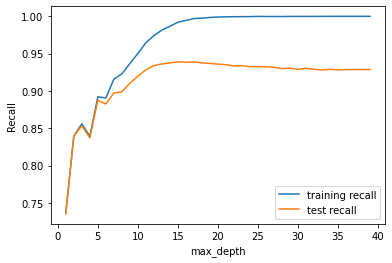

In [131]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_max_depth"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [132]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

In [133]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.869667      0.017167         0.004582        0.000484   
1       0.733656      0.015315         0.004585        0.000492   
2       0.692157      0.026075         0.004400        0.000793   
3       0.635101      0.008455         0.003998        0.000022   
4       0.606179      0.013007         0.004594        0.000494   

  param_min_samples_leaf                    params  split0_test_recall_score  \
0                      5   {'min_samples_leaf': 5}                  0.826369   
1                     25  {'min_samples_leaf': 25}                  0.829743   
2                     45  {'min_samples_leaf': 45}                  0.833896   
3                     65  {'min_samples_leaf': 65}                  0.833896   
4                     85  {'min_samples_leaf': 85}                  0.829484   

   split1_test_recall_score  split2_test_recall_score  \
0                  0.942642                  0.930963   
1                  0.920322                  0.916429   
2                  0.918246                  0.902414   
3                  0.905009                  0.903711   
4                  0.890475                  0.892811   

   split3_test_recall_score  split4_test_recall_score  mean_test_recall_score  \
0                  0.935358                  0.933039                0.913674   
1                  0.914071                  0.929146                0.901942   
2                  0.910955                  0.925772                0.898256   
3                  0.899013                  0.921879                0.892702   
4                  0.897196                  0.901635                0.882320   

   std_test_recall_score  rank_test_recall_score  split0_train_recall_score  \
0               0.043830                       1                   0.973461   
1               0.036462                       2                   0.938161   
2               0.033098                       3                   0.922718   
3               0.030404                       4                   0.916488   
4               0.026693                       5                   0.903446   

   split1_train_recall_score  split2_train_recall_score  \
0                   0.964311                   0.966323   
1                   0.922069                   0.928038   
2                   0.910259                   0.904549   
3                   0.900006                   0.899487   
4                   0.879631                   0.885536   

   split3_train_recall_score  split4_train_recall_score  \
0                   0.965222                   0.963078   
1                   0.926032                   0.927714   
2                   0.914612                   0.922523   
3                   0.901311                   0.913568   
4                   0.895601                   0.891117   

   mean_train_recall_score  std_train_recall_score  
0                 0.966479                0.003650  
1                 0.928403                0.005321  
2                 0.914932                0.007043  
3                 0.906172                0.007314  
4                 0.891066                0.008187

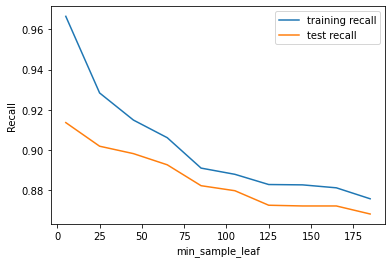

In [134]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_sample_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

In [136]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.919634      0.011339         0.004195        0.000396   
1       0.929116      0.025928         0.004594        0.000494   
2       0.914953      0.017974         0.005388        0.000480   
3       0.886633      0.015753         0.004787        0.000399   
4       0.872268      0.016504         0.004787        0.000399   

  param_min_samples_split                     params  \
0                       5   {'min_samples_split': 5}   
1                      25  {'min_samples_split': 25}   
2                      45  {'min_samples_split': 45}   
3                      65  {'min_samples_split': 65}   
4                      85  {'min_samples_split': 85}   

   split0_test_recall_score  split1_test_recall_score  \
0                  0.831819                  0.949131   
1                  0.809240                  0.934077   
2                  0.800156                  0.927070   
3                  0.805606                  0.920322   
4                  0.796522                  0.919284   

   split2_test_recall_score  split3_test_recall_score  \
0                  0.944718                  0.941070   
1                  0.927329                  0.928089   
2                  0.919284                  0.913292   
3                  0.910978                  0.899273   
4                  0.902673                  0.896677   

   split4_test_recall_score  mean_test_recall_score  std_test_recall_score  \
0                  0.945237                0.922395               0.045360   
1                  0.930444                0.905836               0.048355   
2                  0.919284                0.895817               0.048030   
3                  0.919024                0.891041               0.043370   
4                  0.910459                0.885123               0.044946   

   rank_test_recall_score  split0_train_recall_score  \
0                       1                   0.994614   
1                       2                   0.967101   
2                       3                   0.950555   
3                       4                   0.942314   
4                       5                   0.930569   

   split1_train_recall_score  split2_train_recall_score  \
0                   0.991694                   0.991759   
1                   0.957952                   0.961716   
2                   0.940367                   0.943482   
3                   0.924470                   0.935371   
4                   0.917526                   0.920511   

   split3_train_recall_score  split4_train_recall_score  \
0                   0.992409                   0.992019   
1                   0.954581                   0.960742   
2                   0.936089                   0.942054   
3                   0.920906                   0.933684   
4                   0.914547                   0.920641   

   mean_train_recall_score  std_train_recall_score  
0                 0.992499                0.001087  
1                 0.960418                0.004162  
2                 0.942509                0.004726  
3                 0.931349                0.007723  
4                 0.920759                0.005392

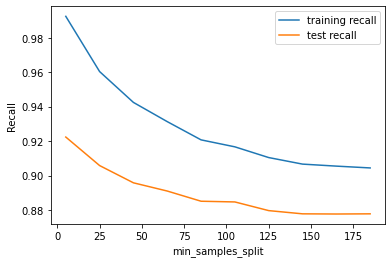

In [137]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [138]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 25),
    'min_samples_split': range(0, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit=refit_score,
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_smote_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   43.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 25),
                         'min_samples_split': range(0, 150, 50)},
             refit='recall_score', verbose=1)

In [139]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9025127861634065


In [140]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                       min_samples_split=50)


In [141]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_smote_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [142]:
y_pred_default = clf_gini.predict(X_test)
cm2 =confusion_matrix(y_test,y_pred_default)
cm2

array([[7479,  777],
       [ 211,  519]], dtype=int64)

In [143]:
TN = cm2[0,0] # true negatives
TP = cm2[1,1] # true positives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false positive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7109589041095891
Specificity:  0.9058866279069767
false positive rate:  0.09411337209302326
positive predictive value:  0.40046296296296297
Negative predictive value:  0.9725617685305592
Misclassification Rate:  0.10994880925884709


In [144]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8900511907411529


### Recall value for Decision Trees is 71%, slightly lesser than logistic regression but quite good!

## RANDOM FOREST

In [145]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [146]:
#Scaling the train set
scaler = StandardScaler()

cat_cols = ['fb_user_June_1.0','fb_user_July_1.0','fb_user_8_1.0',
            'night_pck_user_June_0.0','night_pck_user_July_0.0','night_pck_user_8_0.0']
target_col = ['churn']

X_train[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in telecom.columns if col not in cat_cols + target_col]])

X_train.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
51883    -0.578963     -0.802597      -0.251825      -0.264323   
35039    -0.049849      2.484476       0.337921       0.288714   
35200    -0.386892     -0.732327      -0.251825      -0.264323   
42030     0.196612      0.845644      -0.251825      -0.264323   
3762     -0.482298      1.347116      -0.251825      -0.264323   

       loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
51883         -0.513833         -0.407582         -0.337718     -0.750300   
35039          0.790405          0.214918         -0.337718      3.644093   
35200          0.025365         -0.289415         -0.337718     -0.418269   
42030          1.639108          5.388001         -0.337718      2.195371   
3762          -0.240091         -0.316447         -0.337718      2.202279   

       std_og_t2f_mou_8  std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  \
51883         -0.233015               0.0     -0.147449     -0.494244   
35039         -0.166948               0.0     -0.147449     -0.354967   
35200         -0.233015               0.0     -0.147449     -0.494244   
42030         -0.007108               0.0     -0.147449     -0.197233   
3762          -0.233015               0.0     -0.147449     -0.494244   

       og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  \
51883          0.0       -0.854977         -0.490223         -0.449822   
35039          0.0        1.549926         -0.338106         -0.332455   
35200          0.0       -0.690779          0.296552          0.416753   
42030          0.0        0.691655          1.327049          5.934153   
3762           0.0        0.596556          0.886242          0.407405   

       std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
51883         -0.363029         -0.281112               0.0     -0.479646   
35039         -0.108012         -0.281112               0.0     -0.043635   
35200         -0.363029          0.786849               0.0     -0.369746   
42030         -0.363029          0.285561               0.0     -0.090045   
3762          -0.363029         -0.256203               0.0     -0.477666   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
51883       -0.831346     -0.265582     -0.250296    -0.254993   
35039        1.308061     -0.265582     -0.043537    -0.254993   
35200       -0.191023     -0.265582     -0.250296    -0.086643   
42030        2.218429     -0.265582     -0.250296    -0.234378   
3762         0.105396      2.500244     -0.250296    -0.114129   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
51883         -0.564457         -0.772805       -0.019843           -0.818424   
35039         -0.097608          0.927412        0.639185            0.109894   
35200          0.019104         -0.664234       -0.823034           -0.539929   
42030         -0.564457         -0.390636       -0.184600            0.388389   
3762          -0.097608         -0.138752       -0.019843           -0.818424   

       total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
51883          -0.217060            0.205113     1.479844    -0.469946   
35039          -0.217060           -0.542944    -0.403793    -0.469946   
35200          -0.607745           -0.687917    -0.403793    -0.469946   
42030          -0.607745           -0.687917    -0.403793    -0.469946   
3762           -0.217060            0.205113    -0.360540    -0.092617   

       monthly_2g_8  monthly_3g_8  sachet_3g_8  aug_vbc_3g  jul_vbc_3g  \
51883       2.12765     -0.370666    -0.259248   -0.450804   -0.451987   
35039      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
35200      -0.38774     -0.370666    -0.259248   -0.450804   -0.347303   
42030      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
3762        2.12765     -0.370666    -0.259248    0.202748   -0.018893   

       jun_vbc_3g  avg67_o

In [147]:
# Scaling the test set
X_test[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in telecom.columns if col not in cat_cols + target_col]])

In [148]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_smote_train, y_smote_train = smt.fit_resample(X_train, y_train)
len(X_smote_train)

38528

In [149]:
# Using Lasso to select the features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_smote_train, y_smote_train)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_smote_train)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(38528, 40)
[ 3  5  7  8 11 13 15 17 20 21 24 27 28 30 32 35 38 41 43 44 46 49 51 55
 58 59 61 62 63 64 67 68 69 71 72 73 76 77 78 79]


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [151]:
rf = RandomForestClassifier()
rf.fit(X_lasso, y_smote_train)

RandomForestClassifier()

In [152]:
# Make predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
prediction_test = rf.predict(X_test)
metrics.recall_score(y_test, prediction_test)

0.6575342465753424

In [153]:
confusion_rf=confusion_matrix(y_test,prediction_test)
confusion_rf

array([[7936,  320],
       [ 250,  480]], dtype=int64)

#### With default hyperparameters, RF gives a recall of 65.3%

In [154]:
TN = confusion_rf[0,0] # true negatives
TP = confusion_rf[1,1] # true positives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6575342465753424
Specificity:  0.9612403100775194
false postive rate:  0.03875968992248062
positive predictive value:  0.6
Negative predictive value:  0.9694600537503054
Misclassification Rate:  0.06343200534164256


##### Recall is only 65% with default hyperparameters

### We need some hyperparameter tuning to get the sensitivity higher

### Hyperparameter Tuning

In [155]:
# Import necessary libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True, n_jobs = -1)
rf.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

In [156]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.351315      0.034988         0.065623        0.005930   
1       6.023561      0.199376         0.098736        0.006555   
2       8.700274      0.291403         0.131968        0.007231   
3       9.226465      0.576877         0.134252        0.012126   

  param_max_depth             params  split0_test_recall_score  \
0               2   {'max_depth': 2}                  0.746950   
1               7   {'max_depth': 7}                  0.839606   
2              12  {'max_depth': 12}                  0.895666   
3              17  {'max_depth': 17}                  0.903711   

   split1_test_recall_score  split2_test_recall_score  \
0                  0.786919                  0.795225   
1                  0.903192                  0.906826   
2                  0.965222                  0.969115   
3                  0.983390                  0.980794   

   split3_test_recall_score  split4_test_recall_score  mean_test_recall_score  \
0                  0.798287                  0.810018                0.787480   
1                  0.910436                  0.903192                0.892650   
2                  0.966251                  0.967558                0.952762   
3                  0.982606                  0.980275                0.966155   

   std_test_recall_score  rank_test_recall_score  split0_train_recall_score  \
0               0.021576                       4                   0.786776   
1               0.026658                       3                   0.911816   
2               0.028578                       2                   0.988644   
3               0.031243                       1                   0.999935   

   split1_train_recall_score  split2_train_recall_score  \
0                   0.787360                   0.786062   
1                   0.901629                   0.900526   
2                   0.981961                   0.982091   
3                   0.999676                   0.999481   

   split3_train_recall_score  split4_train_recall_score  \
0                   0.787438                   0.797872   
1                   0.901765                   0.899747   
2                   0.980016                   0.982480   
3                   0.999805                   0.999676   

   mean_train_recall_score  std_train_recall_score  
0                 0.789101                0.004413  
1                 0.903096                0.004422  
2                 0.983038                0.002930  
3                 0.999714                0.000151

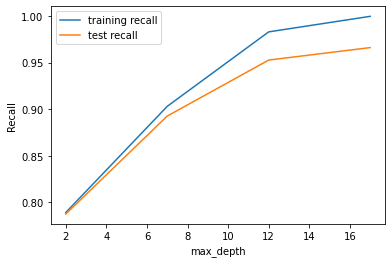

In [157]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Max_depth should be in the range (8,12)

In [158]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10)


## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'n_estimators': range(100, 1500, 400)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

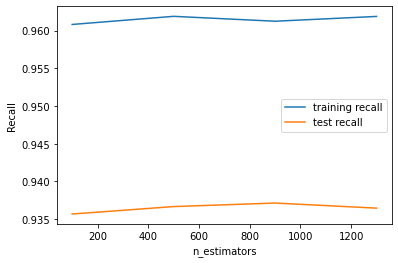

In [159]:
## scores of GridSearch CV
scores = rf.cv_results_

## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### n_estimators should be in the range (700,900)

In [160]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

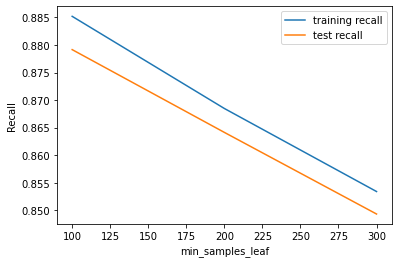

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### min_samples_leaf should be checked in the range (100,200)

In [162]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,15,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [10, 15, 20]}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

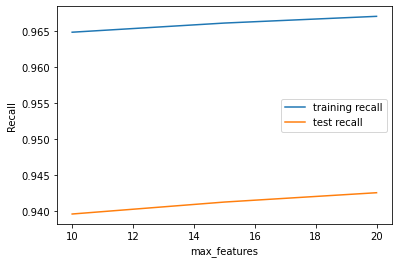

In [163]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### max_features for [15,20]

In [164]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_lasso, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

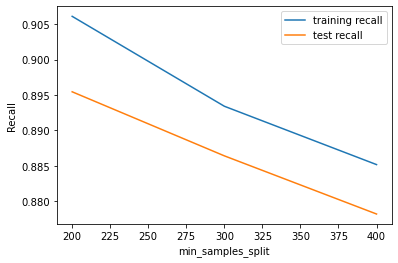

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### min_samples_split should be checked in the range (200,400)

In [166]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [700,800,900], 
    'max_features': [15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, refit = refit_score,
                          cv = 3, n_jobs = -1,verbose = 1)

In [167]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_smote_train)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 48.9min finished


Accuracy is 0.8986192970683137 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 900}


In [168]:
# Final RF Model with features selected from Lasso

model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=900)
model_rf.fit(X_lasso, y_smote_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [169]:
# Evaluation metrics
confusion_rf_all = metrics.confusion_matrix( y_test, prediction_test )
confusion_rf_all

array([[7528,  728],
       [ 167,  563]], dtype=int64)

In [170]:
TN = confusion_rf_all[0,0] # true negatives
TP = confusion_rf_all[1,1] # true positives
FP = confusion_rf_all[0,1] # false positives
FN = confusion_rf_all[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7712328767123288
Specificity:  0.9118217054263565
false postive rate:  0.08817829457364341
positive predictive value:  0.4360960495739737
Negative predictive value:  0.9782975958414555
Misclassification Rate:  0.09959937680836857


#### Random Forest with selected features from Lasso is giving a sensitivity/recall of 77%, better than the decision tree but not as good as the Logistic model.

#### Next we build a random forest with all features from the train set and applying the SMOTE technique for oversampling on the train data, the model is being evaluated using various hyperparamters.

## RANDOM FOREST (with all features)

In [171]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [172]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['fb_user_June_1.0','fb_user_July_1.0','fb_user_8_1.0',
            'night_pck_user_June_0.0','night_pck_user_July_0.0','night_pck_user_8_0.0']
target_col = ['churn']

X_train[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in telecom.columns if col not in cat_cols + target_col]])

X_train.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
51883    -0.578963     -0.802597      -0.251825      -0.264323   
35039    -0.049849      2.484476       0.337921       0.288714   
35200    -0.386892     -0.732327      -0.251825      -0.264323   
42030     0.196612      0.845644      -0.251825      -0.264323   
3762     -0.482298      1.347116      -0.251825      -0.264323   

       loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
51883         -0.513833         -0.407582         -0.337718     -0.750300   
35039          0.790405          0.214918         -0.337718      3.644093   
35200          0.025365         -0.289415         -0.337718     -0.418269   
42030          1.639108          5.388001         -0.337718      2.195371   
3762          -0.240091         -0.316447         -0.337718      2.202279   

       std_og_t2f_mou_8  std_og_t2c_mou_8  isd_og_mou_8  spl_og_mou_8  \
51883         -0.233015               0.0     -0.147449     -0.494244   
35039         -0.166948               0.0     -0.147449     -0.354967   
35200         -0.233015               0.0     -0.147449     -0.494244   
42030         -0.007108               0.0     -0.147449     -0.197233   
3762          -0.233015               0.0     -0.147449     -0.494244   

       og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  \
51883          0.0       -0.854977         -0.490223         -0.449822   
35039          0.0        1.549926         -0.338106         -0.332455   
35200          0.0       -0.690779          0.296552          0.416753   
42030          0.0        0.691655          1.327049          5.934153   
3762           0.0        0.596556          0.886242          0.407405   

       std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
51883         -0.363029         -0.281112               0.0     -0.479646   
35039         -0.108012         -0.281112               0.0     -0.043635   
35200         -0.363029          0.786849               0.0     -0.369746   
42030         -0.363029          0.285561               0.0     -0.090045   
3762          -0.363029         -0.256203               0.0     -0.477666   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
51883       -0.831346     -0.265582     -0.250296    -0.254993   
35039        1.308061     -0.265582     -0.043537    -0.254993   
35200       -0.191023     -0.265582     -0.250296    -0.086643   
42030        2.218429     -0.265582     -0.250296    -0.234378   
3762         0.105396      2.500244     -0.250296    -0.114129   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
51883         -0.564457         -0.772805       -0.019843           -0.818424   
35039         -0.097608          0.927412        0.639185            0.109894   
35200          0.019104         -0.664234       -0.823034           -0.539929   
42030         -0.564457         -0.390636       -0.184600            0.388389   
3762          -0.097608         -0.138752       -0.019843           -0.818424   

       total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
51883          -0.217060            0.205113     1.479844    -0.469946   
35039          -0.217060           -0.542944    -0.403793    -0.469946   
35200          -0.607745           -0.687917    -0.403793    -0.469946   
42030          -0.607745           -0.687917    -0.403793    -0.469946   
3762           -0.217060            0.205113    -0.360540    -0.092617   

       monthly_2g_8  monthly_3g_8  sachet_3g_8  aug_vbc_3g  jul_vbc_3g  \
51883       2.12765     -0.370666    -0.259248   -0.450804   -0.451987   
35039      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
35200      -0.38774     -0.370666    -0.259248   -0.450804   -0.347303   
42030      -0.38774     -0.370666    -0.259248   -0.450804   -0.451987   
3762        2.12765     -0.370666    -0.259248    0.202748   -0.018893   

       jun_vbc_3g  avg67_o

In [173]:
# Scale the test set
X_test[[col for col in telecom.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in telecom.columns if col not in cat_cols + target_col]])

In [174]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_smote_train, y_smote_train = smt.fit_resample(X_train, y_train)
len(X_smote_train)

38528

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [176]:
# Fit the model
rfaf = RandomForestClassifier()
rfaf.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [177]:
# Make predictions
prediction_test = rfaf.predict(X_test)
metrics.recall_score(y_test, prediction_test)

0.6534246575342466

In [178]:
# Confusin Matrix
confusion_rf=confusion_matrix(y_test,prediction_test)
confusion_rf

array([[7952,  304],
       [ 253,  477]], dtype=int64)

In [179]:
TN = confusion_rf[0,0] # true negatives
TP = confusion_rf[1,1] # true positives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6534246575342466
Specificity:  0.9631782945736435
false postive rate:  0.03682170542635659
positive predictive value:  0.6107554417413572
Negative predictive value:  0.9691651432053626
Misclassification Rate:  0.06198531048297352


### Hyperparameter Tuning

In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True, n_jobs = -1)
rf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.177379      0.016610         0.054853        0.002092   
1       6.612721      0.068998         0.091955        0.005255   
2      10.466816      0.682391         0.157978        0.010260   
3      13.575095      0.451793         0.172148        0.024947   

  param_max_depth             params  split0_test_recall_score  \
0               2   {'max_depth': 2}                  0.717363   
1               7   {'max_depth': 7}                  0.838827   
2              12  {'max_depth': 12}                  0.903192   
3              17  {'max_depth': 17}                  0.913314   

   split1_test_recall_score  split2_test_recall_score  \
0                  0.761225                  0.779133   
1                  0.901116                  0.906566   
2                  0.964962                  0.970932   
3                  0.983130                  0.984428   

   split3_test_recall_score  split4_test_recall_score  mean_test_recall_score  \
0                  0.783229                  0.768233                0.761837   
1                  0.911734                  0.907864                0.893221   
2                  0.968588                  0.966779                0.954891   
3                  0.984943                  0.981832                0.969529   

   std_test_recall_score  rank_test_recall_score  split0_train_recall_score  \
0               0.023563                       4                   0.761080   
1               0.027409                       3                   0.913568   
2               0.025925                       2                   0.990396   
3               0.028128                       1                   0.999935   

   split1_train_recall_score  split2_train_recall_score  \
0                   0.760106                   0.773149   
1                   0.903446                   0.903705   
2                   0.983064                   0.986568   
3                   0.999870                   0.999805   

   split3_train_recall_score  split4_train_recall_score  \
0                   0.772580                   0.759263   
1                   0.905723                   0.903316   
2                   0.984687                   0.983518   
3                   0.999805                   0.999805   

   mean_train_recall_score  std_train_recall_score  
0                 0.765236                0.006258  
1                 0.905952                0.003907  
2                 0.985647                0.002666  
3                 0.999844                0.000052

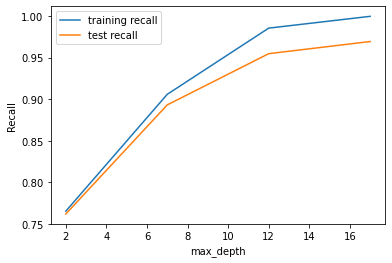

In [182]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [183]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5

## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=8)

## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=8),
             param_grid={'n_estimators': range(100, 1500, 400)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

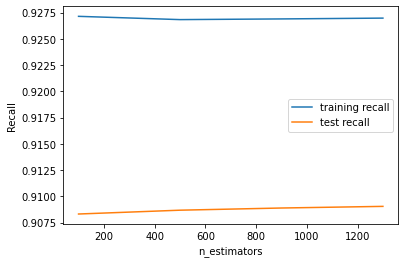

In [184]:
## scores of GridSearch CV
scores = rf.cv_results_

## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [185]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

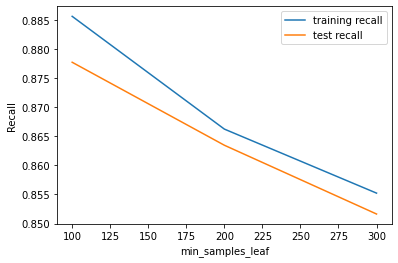

In [186]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [187]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,15,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [10, 15, 20]}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

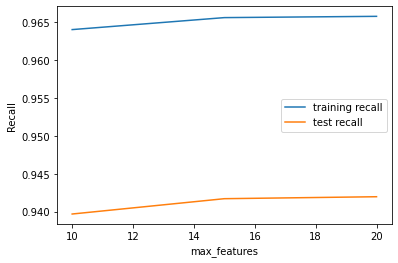

In [188]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [189]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_smote_train,y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

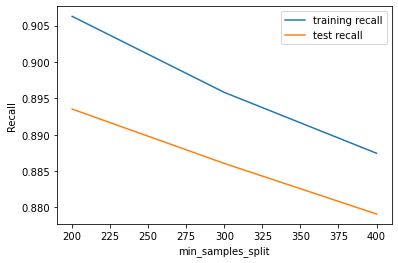

In [190]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [191]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [700,800,900], 
    'max_features': [15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, refit = refit_score,
                          cv = 3, n_jobs = -1,verbose = 1)

In [192]:
# fit the grid search with the data
grid_search.fit(X_smote_train, y_smote_train)
# optimal recall score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 48.8min finished


Accuracy is 0.8991644239246845 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 800}


In [200]:
# Final RF Model with features selected from Lasso

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=12,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=800,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 20,
                                  max_leaf_nodes = 30)
model_rf.fit(X_smote_train, y_smote_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [201]:
# Evaluation metrics
confusion_rf_all = metrics.confusion_matrix(y_test, prediction_test)
confusion_rf_all

array([[7485,  771],
       [ 164,  566]], dtype=int64)

In [202]:
TN = confusion_rf_all[0,0] # true negatives
TP = confusion_rf_all[1,1] # true positives
FP = confusion_rf_all[0,1] # false positives
FN = confusion_rf_all[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7753424657534247
Specificity:  0.9066133720930233
false postive rate:  0.09338662790697674
positive predictive value:  0.42333582647718776
Negative predictive value:  0.978559288795921
Misclassification Rate:  0.10405074560427331


##### It would have been better if we had used a Randomized Search CV instead of GridSearchCV, given the computational time it took for the method we used. We thought of keeping GridSearchCV as it gives a clearer idea on the algorithm. But henceforth, Randomized Search will be the option to look for when we are dealing with a similar high-dimensional data. 

### Random Forest with all features and Random Forest with variables from Lasso give the same recall value almost, around 77%, which is better than than Decision Trees but falls behind Logistic Regression.

### Logistic Regression gives us the best recall value, the primary metric for our business problem.
### So, we take a look at the top 13 features we got from the logistic regression using RFE (15 selected by RFE - 2(dropped due to high multicollinearity))

In [125]:
print(logrf.coef_, logrf.intercept_)

[[-0.19586076 -0.45734865 -2.51577965 -0.6711461  -0.38959141 -0.50700184
   0.33121689 -0.33571618  0.80585084  0.60101791 -1.48402628 -0.49591168
  -0.57743502]] [-0.56869867]


In [126]:
# intercept
intercept_df = pd.DataFrame(logrf.intercept_.reshape((1,1)), columns = ['intercept'])

In [127]:
coefficients = logrf.coef_.reshape((13, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]
coefficients

[-0.196,
 -0.457,
 -2.516,
 -0.671,
 -0.39,
 -0.507,
 0.331,
 -0.336,
 0.806,
 0.601,
 -1.484,
 -0.496,
 -0.577]

In [132]:
logistic_features

['onnet_mou_8',
 'offnet_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'total_rech_data_8',
 'avg67_offnet_mou',
 'avg67_loc_og_mou',
 'avg67_total_ic_mou',
 'avg67_total_rech_data',
 'fb_user_8_1.0',
 'night_pck_user_June_0.0',
 'night_pck_user_July_0.0']

In [198]:
coefficients = logrf.coef_.reshape((13, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_smote_train[col].columns)
coefficients_df = pd.DataFrame(logrf.coef_, columns=logistic_features)

In [199]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  onnet_mou_8  offnet_mou_8  total_ic_mou_8  spl_ic_mou_8  \
0  -0.568699    -0.195861     -0.457349        -2.51578     -0.671146   

   total_rech_num_8  total_rech_data_8  avg67_offnet_mou  avg67_loc_og_mou  \
0         -0.389591          -0.507002          0.331217         -0.335716   

   avg67_total_ic_mou  avg67_total_rech_data  fb_user_8_1.0  \
0            0.805851               0.601018      -1.484026   

   night_pck_user_June_0.0  night_pck_user_July_0.0  
0                -0.495912                -0.577435

## CONCLUSION:
#### Logistic Regression is the model providing the highest recall. It is an interpretable model as well. In Logistic Regression, we could even increase the recall more but in the process, will give rise to a huge number of false positives (there needs to be some sort of a balance). We choose recall as the main metric because we do not want a customer who is a churner to be labelled as a non-churner i.e. we want to reduce the number of false negatives. False positives are still fine in our model as if we label a customer as a churner despite he being not one, it will not lead to a loss of the customer base. We can provide additional discounts to these persons though it wouldn't have been necessary normally but given our objective and the cost of losing a customer and acquiring a new one, it's better to spend some on providing discounted rates and special services as it raises the company's image and goodwill to a great extent.

## OBSERVATIONS

## Trend of Customers who are loyal and do not churn:
#### >Customers having high incoming Minutes of Usage(mou) in August are the least likely to churn followed by those who use facebook in the month of August. 
#### >Customers not using night packs in June and July are also less likely to churn. 
#### >Customers having high total minutes of usage in August within the same network as well as other networks have less intent to churn.
## Trend of Customers who churn
#### >Customers having high incoming mou in June and July combined as well as those who are recharging their data packs more in June and July turn out to be future churners. 

#### >in the action phase, the churners are practically not using the network at all i.e.it seems likely that the action phase can provide adequate information on the customers who are likely to churn soon.

## BUSINESS RECOMMENDATIONS

#### > Seems like customers who are actively using the network in the 'action' phase are less likely to churn. Customers having high mou for incoming calls in the 'good' phase and suddenly falling out on the usage are the future churners. It is highly probable that these customers are not happy with the service or the network qualiy. So, as a first step, the quality of network has to be improved as it is also worth noting that customers having high minutes of usage within the same network in the 'good' phase are also turning out to be future churners. 
#### >August is the month that the business should target and any variation in the behaviour of the customers from the 'good' phase must be acted upon as a priority. 
#### > Customers recharging data packs in June and July and having high mou can be trusted upon and monitored for the time being.
#### > Utmost attention should be given to the last recharge value of a customer in August and a variation in pattern from the previous two months in this regard must be carefully dealt with.